In [3]:
import pandas as pd 
import pickle 
import os
print(pd.__version__)


import numpy as np
import matplotlib.pyplot as plt


import glob
import shutil

from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.font_manager as fm

1.5.3


In [4]:
directory = os.getenv('HOME') + '/aiffel/aiffelthon/'

In [5]:
data_test_path = pd.read_pickle(directory + 'data_test_spm_4000_0317.pkl','gzip')
data_train_path = pd.read_pickle(directory + 'data_train_spm_4000_0317.pkl','gzip')

In [6]:
data_test_path.head()

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
0,jd,날씨,<jd> Your hairstyle is different. You have to ...,헤어 스타일이 다르구마이. 내복을 입어야 대는 긍게 좀 애매해. 더우먼은 벗을 ...,236,11,"[3981, 5, 3981, 3, 256, 72, 315, 1226, 80, 550...","[1, 459, 2457, 947, 2449, 1829, 2464, 630, 245..."
1,jd,영화,<jd> Theres a conflict between good and evil,선과 악에서 갈등을 허는 거여 근디 요게,13,1,"[3981, 5, 3981, 3, 660, 3988, 11, 1316, 957, 3...","[1, 222, 2665, 1773, 69, 283, 2775, 2472, 223,..."
2,jd,회사/학교,"<jd> So when I was a student, it was a little ...",긍께 학생회 하믄서 뭐~ 고것도 나름 그땐 좀 힘들었는디 시간 지낭께 또잉 나름 추...,114,6,"[3981, 5, 3981, 3, 3984, 119, 3981, 3, 86, 11,...","[1, 245, 251, 2521, 2718, 1602, 33, 3, 1115, 2..."
3,jd,연애/결혼,<jd> Before I graduated I bragged about being ...,난 졸업도 허기 쩐에 요로코 효자라고 효녀라고 자랑 쳤제. 착하고 좀 성겍이 착했...,42,2,"[3981, 5, 3981, 3, 3982, 453, 3981, 3, 3322, 3...","[1, 102, 1217, 2784, 2465, 34, 2463, 1458, 246..."
4,jd,건강,<jd> But right after seaming the scars are ver...,근디 올래 꿰맨 직후 흉터가 허벌 찐하잖아 커가시로 좀 긍까 조요운 껄 먹던 나쁜...,220,11,"[3981, 5, 3981, 3, 62, 205, 370, 127, 275, 31,...","[1, 54, 977, 2448, 3888, 2570, 497, 2803, 2448..."


In [7]:
data_train_path.head()

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
0,jd,역사,<jd> I've changed my mind a little bit.,생각이 쪼금씩 바뀌드라고,10,1,"[3981, 5, 3981, 3, 46, 854, 94, 810, 11, 79, 1...","[1, 796, 177, 2655, 2831, 107, 3353, 293, 2448..."
1,jd,가족,<jd> You know what? Foreigners still get used ...,웜마 알겄는가 애국인들이 그또 달 적응하고,17,1,"[3981, 5, 3981, 3, 14, 141, 106, 4005, 3981, 3...","[1, 733, 37, 2765, 1673, 130, 2675, 2477, 89, ..."
2,jd,건강,"<jd> All of a sudden, I think I've ripped off ...",아으 갑자기 에전에 맹장 뜯은 게잉 생각난디야.,22,1,"[3981, 5, 3981, 3, 48, 56, 11, 796, 3, 3981, 3...","[1, 11, 2488, 1667, 280, 763, 856, 2542, 2448,..."
3,jd,스타일,<jd> I have a lot of ideas about getting older...,보먼은 좀 품위 있게 나이 들어가야 되겠단 싱각을 참 마이 해요잉.,18,1,"[3981, 5, 3981, 3, 104, 11, 155, 56, 2402, 67,...","[1, 1545, 44, 2448, 2911, 2736, 15, 2461, 361,..."
4,jd,먹거리,"<jd> It's a little bit of a tastey, but still...",약깐 좀 약깐 맛이가 쪼까 머시기 카긴 한디 그또,18,1,"[3981, 5, 3981, 3, 3983, 3, 3988, 11, 79, 138,...","[1, 155, 44, 155, 239, 141, 897, 1053, 2463, 8..."


In [8]:
data_test_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg       1500 non-null   object
 1   topic     1500 non-null   object
 2   eng       1500 non-null   object
 3   dial      1500 non-null   object
 4   tok_len   1500 non-null   int64 
 5   tok_cat   1500 non-null   int64 
 6   toks_en   1500 non-null   object
 7   toks_dec  1500 non-null   object
dtypes: int64(2), object(6)
memory usage: 93.9+ KB


In [9]:
data_train_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340262 entries, 0 to 1340261
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   reg       1340262 non-null  object
 1   topic     1340262 non-null  object
 2   eng       1340262 non-null  object
 3   dial      1340262 non-null  object
 4   tok_len   1340262 non-null  int64 
 5   tok_cat   1340262 non-null  int64 
 6   toks_en   1340262 non-null  object
 7   toks_dec  1340262 non-null  object
dtypes: int64(2), object(6)
memory usage: 81.8+ MB


In [13]:
data_train_path.isnull().sum()

reg         0
topic       0
eng         0
dial        0
tok_len     0
tok_cat     0
toks_en     0
toks_dec    0
dtype: int64

In [ ]:
data_train_path.

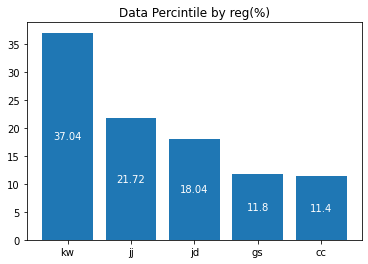

In [163]:
data = data_train_path.reg.value_counts(normalize=True).multiply(100).round(2)
fig, ax = plt.subplots()
p = ax.bar(data.index, data)
ax.bar_label(p, label_type='center', color='white')
plt.title("Data Percintile by reg(%)")
plt.show()

# test data 확인 

In [12]:
data_test_path.tok_cat.value_counts()

1     513
2     129
8     127
4     118
6     110
3     110
7      92
5      88
11     79
12     73
9      38
13     14
10      9
Name: tok_cat, dtype: int64

In [44]:
data_test_path.tok_len.unique()

array([236,  13, 114,  42, 220,  18, 195,  58, 244, 247,  98, 249,  12,
       176,  32, 207,  16,  25, 245, 274, 151, 254,  53,  29,  31, 100,
       110, 202, 216,  95,  23, 230, 115,   7,  34,  36, 111,  91,  33,
       223,   9, 117,  41,  38,  19, 130, 126,  11,  73, 206,  49, 112,
         8, 132,  27,  52,  40, 299, 193, 107, 101,  65, 224,  14, 203,
        85, 108,  21, 239, 135, 234,  15,  54, 287, 205,  62,   6, 229,
       246, 157, 131, 172,  59, 222, 162,  48, 106, 285,  26,  51, 256,
       128, 277, 226,  24, 142, 109,  17, 191, 221, 242, 137,  74, 139,
       262,  75, 122,  61, 105, 218, 190,  57,  20,  79,  81, 258, 187,
        46,  22, 194,  97, 125, 204, 225, 189,  92, 213, 152, 253, 116,
       177, 268,  87,  99,  10,  64,  35, 113, 103, 124,  47,  66, 276,
       233, 235,  88, 290,  72, 147, 134,  67,  84, 165,  78, 227, 201,
       171, 123,  28,  82,   5, 175,  96, 146, 192, 180,  69, 211,  71,
        63, 102, 183, 154, 197, 169, 181,  76, 144, 164, 186, 20

In [35]:
data_test_path.reg.value_counts()

jd    300
jj    300
cc    300
gs    300
kw    300
Name: reg, dtype: int64

In [53]:
data_test_path.topic.value_counts()

가족            153
먹거리           113
여행지(국내/해외)     92
연애/결혼          88
회사/학교          82
건강             64
드라마            58
성격             57
취미             50
쇼핑             41
계절             37
스타일            36
영화             35
음악             33
다이어트           33
방송/연예          30
아르바이트          30
반려동물           29
꿈(목표)          29
자동차/오토바이       28
군대             27
재테크            27
종교             26
공연             24
선물             24
게임             24
스포츠/레저         24
역사             21
SNS            20
경제             19
만화             18
전자기기           18
문학             18
날씨             16
자격증            16
좌우명            15
법률             13
정치             12
콤플렉스           12
4차산업혁명          8
Name: topic, dtype: int64

In [34]:
data_test_path.sort_values(by='tok_cat' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
620,cc,아르바이트,<cc> What was the episode is that it was a mar...,에피소드는 뭐였냐믄 고기가 인자 시골이 있는 마트였단 말여. 아 누나 세대는 쫌 ...,285,13,"[3981, 7, 3981, 3, 3989, 28, 86, 19, 3374, 295...","[1, 280, 2693, 2585, 2514, 2452, 33, 2796, 259..."
746,cc,건강,<cc> The Seon Hospital asked me to make a rese...,머시기 선병원에서 해주걸텨? 것다 예약을 했여 그랬드냐 한적한 산길 겉은 디서 그...,323,13,"[3981, 7, 3981, 3, 1099, 3981, 3, 3982, 27, 39...","[1, 1053, 2463, 222, 2892, 2584, 69, 918, 2623..."
294,jd,스포츠/레저,"<jd> Oh, I didn't get it, and then I thought, ...",아따 고걸 못했구나 그른 생각이 들었고 그담에 또잉 와따 고 안전교육에 대해서이 디...,290,13,"[3981, 5, 3981, 3, 3989, 3, 3981, 3, 321, 3, 3...","[1, 289, 1034, 203, 2534, 405, 59, 796, 1122, ..."
77,jd,계절,"<jd> You know, you've got a little bit of a th...",어~ 오빠도 약깐 그른 거이 있으야 약깐 이른 계절에 좀 달 어울리는 그른 근까 ...,299,13,"[3981, 5, 3981, 3, 14, 141, 3, 26, 3, 46, 249,...","[1, 16, 3, 1193, 2465, 155, 59, 110, 1431, 155..."
978,gs,날씨,<gs> They said they dont feel good You can rat...,별루 기분이 알았느 좋대예 우산은 아싸리 우산을 써뻐리머 되는데 안개 낏다꼬 우산 ...,302,13,"[3981, 6, 3981, 3, 1099, 3994, 223, 181, 195, ...","[1, 2041, 1392, 2449, 279, 43, 2493, 2524, 64,..."
...,...,...,...,...,...,...,...,...
915,gs,재테크,<gs> People who dont have real estate right no...,이래저래 짐 부동산은 없은 사람은 인대이 머 영끌이 해가 산대이 카지만은 짐 영끌이...,22,1,"[3981, 6, 3981, 3, 3982, 227, 212, 195, 104, 6...","[1, 1145, 2556, 2501, 486, 83, 2581, 2700, 247..."
211,jd,반려동물,<jd> Then theres a smart animal not a dog Chim...,그라믄 갱아지 말고잉 똑또간 동물 모 있제 침팬지가 쩰 똑똑 똑똑 할라나,27,1,"[3981, 5, 3981, 3, 3989, 38, 354, 11, 1774, 32...","[1, 825, 2518, 1063, 1471, 38, 192, 615, 2537,..."
917,gs,회사/학교,<gs> Ims a little fortunate that I didnt do it...,짐 알았느 하다꼬 핸 상태라서 -안하- 알았느 하이 핸 기 쫌 다행이라꼬 느껴지네예.,16,1,"[3981, 6, 3981, 3, 648, 11, 79, 2989, 272, 47,...","[1, 486, 279, 21, 871, 92, 1917, 1982, 2448, 3..."
918,gs,자동차/오토바이,<gs> So I think the appearance is a little imp...,그서 내느 외관도 쫌 약깐 중요하다꼬 생각한대이.,14,1,"[3981, 6, 3981, 3, 3984, 3981, 3, 107, 19, 324...","[1, 121, 600, 454, 2698, 2465, 19, 155, 1011, ..."


In [59]:
tok_cat_13 = data_test_path[data_test_path['tok_cat'] == 13]
tok_cat_12 = data_test_path[data_test_path['tok_cat'] == 12]
tok_cat_11 = data_test_path[data_test_path['tok_cat'] == 11]
tok_cat_10 = data_test_path[data_test_path['tok_cat'] == 10]
tok_cat_9 = data_test_path[data_test_path['tok_cat'] == 9]
tok_cat_8 = data_test_path[data_test_path['tok_cat'] == 8]
tok_cat_7 = data_test_path[data_test_path['tok_cat'] == 7]
tok_cat_6 = data_test_path[data_test_path['tok_cat'] == 6]
tok_cat_5 = data_test_path[data_test_path['tok_cat'] == 5]
tok_cat_4 = data_test_path[data_test_path['tok_cat'] == 4]
tok_cat_3 = data_test_path[data_test_path['tok_cat'] == 3]
tok_cat_2 = data_test_path[data_test_path['tok_cat'] == 2]
tok_cat_1 = data_test_path[data_test_path['tok_cat'] == 1]

## tok_cat

In [56]:
tok_cat_13.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
746,cc,건강,<cc> The Seon Hospital asked me to make a rese...,머시기 선병원에서 해주걸텨? 것다 예약을 했여 그랬드냐 한적한 산길 겉은 디서 그...,323,13,"[3981, 7, 3981, 3, 1099, 3981, 3, 3982, 27, 39...","[1, 1053, 2463, 222, 2892, 2584, 69, 918, 2623..."
978,gs,날씨,<gs> They said they dont feel good You can rat...,별루 기분이 알았느 좋대예 우산은 아싸리 우산을 써뻐리머 되는데 안개 낏다꼬 우산 ...,302,13,"[3981, 6, 3981, 3, 1099, 3994, 223, 181, 195, ...","[1, 2041, 1392, 2449, 279, 43, 2493, 2524, 64,..."
77,jd,계절,"<jd> You know, you've got a little bit of a th...",어~ 오빠도 약깐 그른 거이 있으야 약깐 이른 계절에 좀 달 어울리는 그른 근까 ...,299,13,"[3981, 5, 3981, 3, 14, 141, 3, 26, 3, 46, 249,...","[1, 16, 3, 1193, 2465, 155, 59, 110, 1431, 155..."
818,cc,게임,<cc> Its not that fun Its only compared to whe...,그릏게 마이 재미있는것도 아녀 친구들이랑 헐 띠 대하면 그른 편이여. 인자 쪼꼼 ...,294,13,"[3981, 7, 3981, 3, 526, 145, 47, 380, 3981, 3,...","[1, 493, 66, 736, 1708, 623, 11, 2761, 300, 11..."
763,cc,여행지(국내/해외),"<cc> At just the moment you see it, there are ...",니가 탁 보는 시점에서 섬이 삼백 개가 넘어 삼백 개가 어~ 이케 헐 수가 있나 이...,293,13,"[3981, 7, 3981, 3, 3983, 132, 19, 2048, 26, 21...","[1, 394, 631, 1465, 41, 2748, 69, 2448, 3381, ..."
294,jd,스포츠/레저,"<jd> Oh, I didn't get it, and then I thought, ...",아따 고걸 못했구나 그른 생각이 들었고 그담에 또잉 와따 고 안전교육에 대해서이 디...,290,13,"[3981, 5, 3981, 3, 3989, 3, 3981, 3, 321, 3, 3...","[1, 289, 1034, 203, 2534, 405, 59, 796, 1122, ..."
102,jd,드라마,<jd> I'm saying that I used the tape that I us...,적에 귀했던 비디오테이프를 사용해서 찍었다고는 하간디 그체 암만해도 왜냐믄 우리가...,287,13,"[3981, 5, 3981, 3, 3995, 484, 47, 3981, 3, 525...","[1, 432, 2466, 633, 891, 127, 2469, 2504, 2618..."
600,cc,SNS,<cc> I was a little shocked that the kids said...,애덜이 그릏게 말을 허는 꺼 자체가 낸 쫌 충격이었던 거여 왜냐믄 카톡을루 마이 ...,286,13,"[3981, 7, 3981, 3, 86, 11, 79, 3530, 47, 19, 5...","[1, 1792, 2449, 493, 650, 223, 39, 2146, 350, ..."
132,jd,4차산업혁명,"<jd> For example, I go to school a little bit ...",에를 들어갖고 학원을 좀 더 다녀쌌냐 발전되는 그른 꺼를 늦출 수 있고이 이른 약...,285,13,"[3981, 5, 3981, 3, 55, 1677, 3, 3981, 3, 57, 3...","[1, 280, 2491, 157, 557, 2074, 2472, 44, 146, ..."
620,cc,아르바이트,<cc> What was the episode is that it was a mar...,에피소드는 뭐였냐믄 고기가 인자 시골이 있는 마트였단 말여. 아 누나 세대는 쫌 ...,285,13,"[3981, 7, 3981, 3, 3989, 28, 86, 19, 3374, 295...","[1, 280, 2693, 2585, 2514, 2452, 33, 2796, 259..."


In [47]:
tok_cat_13.reg.value_counts()

cc    7
jd    5
gs    2
Name: reg, dtype: int64

In [48]:
tok_cat_13.topic.value_counts()

여행지(국내/해외)    2
게임            2
계절            1
드라마           1
4차산업혁명        1
스포츠/레저        1
SNS           1
아르바이트         1
건강            1
공연            1
법률            1
날씨            1
Name: topic, dtype: int64

In [60]:
tok_cat_12.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
612,cc,여행지(국내/해외),<cc> From departing from there to the schedule...,요기서 출발하는 거부통 다시 돌아오는 일정까정 빠짐없이 쫌 학창 시절 학교에서 떠...,276,12,"[3981, 7, 3981, 3, 265, 946, 252, 31, 284, 96,...","[1, 2390, 2468, 903, 2710, 139, 14, 2324, 990,..."
284,jd,스타일,<jd> I think its a little short in summer and ...,어~ 여름에 쫌 짭게 짤르고 겨울에는 걍 끝까지기는 그른 편인 거이 같은디 여 보...,276,12,"[3981, 5, 3981, 3, 107, 108, 11, 79, 1013, 64,...","[1, 16, 3, 909, 2466, 19, 2448, 3620, 2461, 15..."
854,cc,정치,<cc> You made him come out like that and get c...,그릏게 나오게 해가꼬 지 사람 욕 읃어 먹는 겨 그른데 연좌제 걸려가주구 지끔은 ...,275,12,"[3981, 7, 3981, 3, 14, 596, 230, 254, 172, 77,...","[1, 493, 382, 2461, 505, 26, 101, 1239, 2448, ..."
20,jd,드라마,<jd> I saw an article on the news with such th...,뭐~ 그른 껄로 뉴스에 나왔던 어뜬 기사를 봤거든? 넨 실지로 내용은 보진 안했고 ...,274,12,"[3981, 5, 3981, 3, 555, 131, 3443, 41, 82, 19,...","[1, 33, 3, 59, 2137, 2448, 3224, 2546, 2466, 8..."
607,cc,계절,<cc> And I dont like the air conditioner itsel...,그리구 나가 에어컨 자체를 싫어해가꼬 알은 키구 선풍기만 키구 있구려 막~ 보라색...,272,12,"[3981, 7, 3981, 3, 33, 3981, 3, 195, 77, 19, 1...","[1, 774, 76, 280, 2457, 3156, 1245, 2491, 966,..."
...,...,...,...,...,...,...,...,...
900,gs,스포츠/레저,<gs> Sixtysix fifty fifty stand on the court a...,백칠십오가 코트에 스잖아 금 거진 슨 걍 선수들이 반밲이 알았느 된대이 느낌상 아...,243,12,"[3981, 6, 3981, 3, 594, 416, 3988, 594, 2891, ...","[1, 586, 2875, 2648, 2504, 2450, 383, 2628, 24..."
685,cc,계절,<cc> I think its going to be a little dangerou...,쫌 인자 위험할 꺼 겉은 겨. 구 아쉬움이 있드라구 에어컨을루 제습기 지가 마이...,243,12,"[3981, 7, 3981, 3, 107, 108, 153, 30, 54, 11, ...","[1, 19, 79, 401, 2865, 2564, 39, 308, 243, 245..."
702,cc,아르바이트,<cc> I remember that its me. But when it was a...,그랬든 기억이 또~ 나는구만. 근디 구 가게 크기 정도이 따졌을 띠 먼가 핸 빡세...,243,12,"[3981, 7, 3981, 3, 604, 47, 108, 95, 4001, 398...","[1, 334, 2568, 985, 48, 3, 18, 2452, 1698, 245..."
841,cc,성격,<cc> My son is very nauseous and he is very na...,울 아들래미는 씅질 검거지 나한티 검거지 쌓구 검거지 그~ 인저는 오늘이 며칠이여...,243,12,"[3981, 7, 3981, 3, 3994, 554, 80, 304, 133, 15...","[1, 72, 942, 2501, 2576, 2452, 2448, 3543, 262..."


In [62]:
tok_cat_12.reg.value_counts()

cc    32
jd    21
gs    19
kw     1
Name: reg, dtype: int64

In [61]:
tok_cat_12.topic.value_counts()

건강            5
회사/학교         5
여행지(국내/해외)    4
음악            4
스타일           4
군대            4
취미            4
선물            3
정치            3
재테크           3
반려동물          2
SNS           2
다이어트          2
공연            2
계절            2
스포츠/레저        2
가족            2
먹거리           2
아르바이트         2
게임            2
전자기기          1
좌우명           1
문학            1
성격            1
종교            1
자격증           1
꿈(목표)         1
영화            1
자동차/오토바이      1
경제            1
만화            1
법률            1
드라마           1
콤플렉스          1
Name: topic, dtype: int64

In [63]:
tok_cat_11.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
836,cc,가족,<cc> But when the second baby is hugged like t...,근디 인자 두째 애기는 이케 안구 있으믄 지 품이 이케 쏙 들어와유 안직 키가 짝아...,241,11,"[3981, 7, 3981, 3, 62, 119, 19, 966, 749, 80, ...","[1, 54, 79, 173, 2851, 130, 379, 71, 50, 2464,..."
671,cc,재테크,<cc> I put it in another place but I didnt stu...,또 따른 디다가 찝어 넣었어유 끄때 인자 공부 하나두 알은 혀구 그양 나가 감이 좋...,241,11,"[3981, 7, 3981, 3, 337, 29, 64, 692, 528, 74, ...","[1, 48, 440, 108, 201, 1986, 2457, 1187, 332, ..."
1089,gs,공연,<gs> The person felt a little different Once u...,사람이서 약깐 따르께 느껴지더라꼬 그~ 걍 그~ 엣날에느 고런 긋도 있었대이 어뜬...,239,11,"[3981, 6, 3981, 3, 1099, 366, 942, 11, 79, 550...","[1, 1999, 155, 112, 2539, 2512, 1804, 2456, 25..."
1046,gs,가족,<gs> I try not to eat much and not to eat dinn...,많이 알았느 묵꼬 저녁을 아에 알았느 물라꼬 노력하지를. 흥행이래이 카느 기 없었...,239,11,"[3981, 6, 3981, 3, 377, 145, 30, 191, 257, 40,...","[1, 1730, 279, 1542, 1827, 2472, 2437, 279, 17..."
649,cc,취미,<cc> I should try that. I started but while sw...,이~ 그릏게 해봐야겠어. 쫌 나가 시작했잖여 근디 또 수영이 해다가 또 코로나 땜...,239,11,"[3981, 7, 3981, 3, 312, 377, 47, 4001, 3981, 3...","[1, 12, 3, 493, 32, 1869, 640, 2451, 2448, 19,..."
...,...,...,...,...,...,...,...,...
722,cc,연애/결혼,<cc> So its a little good in that respect but ...,그서 그른 점에서는 쫌 좋긴 한디 그래두 단점이 헤어지믄 인자 또 어~ 그리구 게...,219,11,"[3981, 7, 3981, 3, 3984, 108, 11, 79, 173, 64,...","[1, 121, 59, 530, 1189, 19, 43, 2635, 555, 117..."
886,cc,게임,<cc> Or youre going to play a completely diffe...,아니믄은 아이 따른 포지션을 해보는 거지. 쫌 뭐랄까 탱탱하구 그리구 인자 탱탱하...,218,11,"[3981, 7, 3981, 3, 3990, 356, 153, 30, 411, 11...","[1, 98, 414, 31, 440, 754, 2456, 3080, 2472, 7..."
789,cc,여행지(국내/해외),"<cc> With 50,000 won, what~ I was carrying ar...",오만 완 권을루 뭐~ 이케 쓱 들구 다녔었잖아. 백 우리가 환상했던 구 옛날의 구...,218,11,"[3981, 7, 3981, 3981, 3, 117, 3981, 3, 423, 3,...","[1, 36, 2498, 520, 2448, 3098, 674, 33, 3, 71,..."
616,cc,먹거리,"<cc> I forgot, so I think I'd like to go to th...",그라구 까먹더라구 그서 여튼 그른 오래된 가게 맛집도 함 가헌티 잡은 꺼 같애. ...,218,11,"[3981, 7, 3981, 3, 2059, 3, 43, 3981, 3, 107, ...","[1, 1413, 553, 2548, 791, 121, 73, 2787, 59, 1..."


In [64]:
tok_cat_11.reg.value_counts()

jd    26
cc    26
gs    20
kw     5
jj     2
Name: reg, dtype: int64

In [65]:
tok_cat_11.topic.value_counts()

가족            9
여행지(국내/해외)    8
성격            6
재테크           4
먹거리           4
다이어트          3
게임            3
연애/결혼         3
계절            3
건강            3
군대            2
콤플렉스          2
종교            2
취미            2
음악            2
아르바이트         2
공연            2
반려동물          2
영화            2
스타일           2
전자기기          2
선물            2
회사/학교         1
법률            1
경제            1
방송/연예         1
자동차/오토바이      1
좌우명           1
만화            1
문학            1
날씨            1
Name: topic, dtype: int64

In [66]:
tok_cat_10.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
839,cc,쇼핑,<cc> Its small long padded jackets so I return...,짝은 거유 롱 패딩이 그서 반품하구 다시 시킨 즉이 있어유 그서 드 그~ 당근 마...,217,10,"[3981, 7, 3981, 3, 526, 662, 371, 2263, 2832, ...","[1, 1836, 14, 2555, 2448, 3049, 1261, 3189, 24..."
1067,gs,성격,<gs> Should I say its a little bit of an artis...,어~ 약깐 관종이래이 케야 되노 제한테 쫌 돟은 성격이라꼬 생각하느 기 어~ 쫌 ...,217,10,"[3981, 6, 3981, 3, 3989, 165, 3981, 3, 201, 10...","[1, 16, 3, 155, 351, 2879, 2449, 271, 893, 249..."
31,jd,건강,"<jd> Yeah, I'm Ninos, and I'm a non-inflammato...",니 쩌는 노니라고 노니주스라고 해가꼬 염증을 쭐여주는 이르케 단계의 단계 늘려서 ...,216,10,"[3981, 5, 3981, 3, 174, 3989, 3, 3981, 3, 3995...","[1, 47, 1363, 189, 2476, 68, 189, 2476, 2485, ..."
120,jd,여행지(국내/해외),"<jd> Because our age is the best for friends, ...",왜냐면 울 나이는 친구들끼리 가서나 젤 좋그등 방금 말했데끼 좋아혀 축하해 줬는디...,216,10,"[3981, 5, 3981, 3, 3982, 3998, 156, 442, 1044,...","[1, 525, 2531, 72, 361, 2452, 1833, 1157, 1141..."
421,jj,먹거리,"<jj> I don't know if it's big enough, but I do...",크게는 안되도 거 다이 리모콘 무신거 이건거 다이 들어갈 수 이신건가 응. 아게 ...,216,10,"[3981, 4, 3981, 3, 84, 3, 3983, 141, 100, 29, ...","[1, 413, 2461, 2452, 1010, 2465, 14, 220, 1376..."
716,cc,음악,<cc> So thats what happened so they already sh...,근까 그릏게 됐으니께 걔네는 하마 어는 쩡도 그른 식으루 아이돌이 보여줄 만한 모습...,216,10,"[3981, 7, 3981, 3, 3984, 303, 106, 1094, 43, 1...","[1, 663, 493, 386, 1406, 2448, 3461, 2528, 245..."
963,gs,쇼핑,<gs> So its a little damaged and throws away a...,그서 그기 쫌 상해가 베려 베리께 되가 고런 경우가 많았느 꺼 같애예. 그서 내느...,216,10,"[3981, 6, 3981, 3, 3984, 108, 11, 79, 2216, 32...","[1, 121, 276, 19, 109, 1099, 889, 2541, 889, 2..."
1159,gs,공연,<gs> If you perform in Seoul for two months yo...,거진 공연을 그꼬 서울에서 두 달 카면은 부산에서 이일 하거든예. 이십 삼일인가 ...,216,10,"[3981, 6, 3981, 3, 4000, 26, 1997, 64, 3981, 3...","[1, 778, 2365, 2472, 1937, 1242, 69, 173, 97, ..."
1305,kw,스타일,<kw> Where do you want to invest more style? I...,어데다 좀 스타일을 마 투자하고 싶나? 입구 할려고 했었는데 인자는 약간 남이 보...,216,10,"[3981, 8, 3981, 3, 660, 66, 26, 169, 30, 1680,...","[1, 481, 2462, 44, 947, 2472, 20, 1124, 2484, ..."


In [67]:
tok_cat_10.reg.value_counts()

gs    3
jd    2
cc    2
jj    1
kw    1
Name: reg, dtype: int64

In [68]:
tok_cat_10.topic.value_counts()

쇼핑            2
건강            1
여행지(국내/해외)    1
먹거리           1
음악            1
성격            1
공연            1
스타일           1
Name: topic, dtype: int64

In [69]:
tok_cat_9.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
852,cc,먹거리,<cc> I think almost all of them use frozen foo...,거진 다 냉동 식품을루 만두를 허는 꺼 같은디 내는 구 중에서도 근디 지가 집적 ...,215,9,"[3981, 7, 3981, 3, 107, 763, 178, 56, 291, 535...","[1, 778, 42, 737, 2581, 322, 2911, 674, 84, 25..."
911,gs,자동차/오토바이,<gs> He said he was a very funny person At fir...,가가 대께 웃기느 인간이대이 그래이 그~ 뭐이꼬 칼 수 엄시 것때 처음에 뭐~ 머 ...,215,9,"[3981, 6, 3981, 3, 3982, 223, 71, 86, 11, 304,...","[1, 929, 618, 647, 2116, 23, 1714, 58, 749, 10..."
1154,gs,법률,<gs> I'm not blaming you for that. I remember...,그~ 뭐이꼬 고거를 가주꼬 탓할 그느 아이고마 사기를 직이꼬 어뜨케 뜯노 묵을 고...,215,9,"[3981, 6, 3981, 3, 3995, 145, 687, 275, 31, 26...","[1, 10, 3, 1107, 2483, 1347, 659, 2448, 3650, ..."
1094,gs,여행지(국내/해외),<gs> And also with my friends You have to look...,게다가 뭐~ 인대이 친구들이랑 쫌 옆 사람 보꼬 내려야 된디 카민시 그래가 제주...,215,9,"[3981, 6, 3981, 3, 33, 459, 123, 94, 583, 3981...","[1, 28, 201, 33, 3, 230, 300, 1186, 19, 2448, ..."
1393,kw,먹거리,<kw> They don't get attracted to each other by...,돗 마카 술이 떡이 디게 술러덕술러덕 들어간다는 자체부터 서름 이성으로 끌리지가 않...,214,9,"[3981, 8, 3981, 3, 1099, 3994, 84, 3, 3983, 15...","[1, 2448, 3345, 235, 772, 2449, 887, 2449, 329..."
1133,gs,건강,<gs> I like it because I mix these things grin...,이른 꺼 막 썪노 여노 가주꼬 갈아 가주꼬 아침에 묵느 꺼니께 내느 좋은데 느무 ...,214,9,"[3981, 6, 3981, 3, 77, 29, 159, 3981, 3, 1823,...","[1, 126, 39, 74, 2448, 3566, 2605, 73, 2605, 6..."
1012,gs,법률,<gs> How do you think it would be good to chan...,고런 그느 니가 봤으 땐 어뜨케 변하머 좋을 꺼 같애? 쌤 즈그가 쫌 맘에 알았느...,214,9,"[3981, 6, 3981, 3, 402, 66, 26, 107, 29, 313, ...","[1, 206, 1113, 394, 2369, 241, 470, 1045, 2459..."
757,cc,스포츠/레저,<cc> So in basketball theres a score called tr...,그까 농구에서는 트리플 더블이라는 스코어가 있걸랑 예를 들어가꼬 그러기 땜이 그른...,213,9,"[3981, 7, 3981, 3, 3984, 64, 3070, 354, 11, 29...","[1, 713, 1166, 2464, 1189, 1031, 2481, 2951, 1..."
239,jd,만화,"<jd> When it changed into a drama, he was so g...",그는 드라마로도 바꼈을 띠 디게 그~ 임시완이 연기를 잘하고잉 거 나오는 싸람들이 ...,213,9,"[3981, 5, 3981, 3, 3989, 38, 29, 854, 635, 11,...","[1, 10, 2452, 744, 2497, 2465, 2131, 2472, 268..."
742,cc,날씨,"<cc> It's just that it's kind of slippery, and...",그양 미끄럽것더라구 잘못하믄 너머 넘어지겄더라구 가랑잎이 짠뜩 쌓이구 살얼음이 얼었...,213,9,"[3981, 7, 3981, 3, 3983, 3, 3988, 132, 47, 29,...","[1, 362, 217, 2785, 2929, 2592, 791, 1526, 105..."


In [70]:
tok_cat_9.reg.value_counts()

gs    14
jd     9
cc     8
jj     4
kw     3
Name: reg, dtype: int64

In [71]:
tok_cat_9.topic.value_counts()

먹거리           5
회사/학교         4
연애/결혼         4
날씨            3
자동차/오토바이      3
건강            2
만화            2
법률            2
여행지(국내/해외)    2
영화            1
경제            1
음악            1
스포츠/레저        1
스타일           1
성격            1
가족            1
취미            1
재테크           1
계절            1
방송/연예         1
Name: topic, dtype: int64

In [72]:
tok_cat_8.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
682,cc,성격,<cc> Youre a timid gwanjong he said So theres ...,당신은 소심한 관종이래는 거여 그면서 까 나랑 나이 차이가 마이 내는 사람과 고...,204,8,"[3981, 7, 3981, 3, 14, 17, 11, 3130, 34, 3277,...","[1, 1513, 2470, 119, 2636, 2489, 351, 2879, 24..."
232,jd,드라마,<jd> When I watch foreign dramas and movies I ...,거이 애국 드라마나 영화잉 보믄 근거 소재로 해가꼬 마이 헌 웜마 누구여 머시기 ...,204,8,"[3981, 5, 3981, 3, 3989, 38, 3981, 3, 464, 180...","[1, 110, 130, 2675, 744, 2458, 452, 2496, 277,..."
365,jj,쇼핑,<jj> Yesh its because you make a lot of money ...,맞다게 요 돈도 허영 벌긴 하난이 경헌 사름 많네 거 어린이집 닮은 꺼도 보믄 문...,204,8,"[3981, 4, 3981, 3, 91, 3989, 108, 159, 26, 295...","[1, 1262, 27, 313, 2465, 581, 389, 2635, 1614,..."
1285,kw,성격,<kw> Theres a situation like this and I kind o...,약간 이딴 사태두 있구 해가주구 아따 좀 내 커필 어떠 드십니까. 설탕과 구르무를...,204,8,"[3981, 8, 3981, 3, 660, 3988, 11, 1361, 77, 87...","[1, 1612, 522, 24, 2747, 2500, 721, 32, 314, 2..."
919,gs,SNS,<gs> Its not always uploaded every day but if ...,꼬 맨날맨날 올리느 기 아이꼬 쫌 텀 있께 올리머 또 어~ 또 짐 뭐~ 당장 생각...,204,8,"[3981, 6, 3981, 3, 526, 145, 463, 187, 225, 33...","[1, 253, 915, 2570, 2567, 2133, 2490, 30, 31, ..."
...,...,...,...,...,...,...,...,...
320,jj,건강,<jj> I went and didn't even eat it. I came in ...,부랴부랴 갔다왕 먹지도 못행 뱃속에 담앙 와신디 걸련 게난이 존 나라 맛좋앙게 ...,171,8,"[3981, 4, 3981, 3, 285, 40, 321, 3, 3983, 253,...","[1, 83, 3229, 2506, 3229, 987, 2894, 62, 1226,..."
383,jj,회사/학교,<jj> Oh thats right thats right You said you w...,어게 맞은게 기네이 현금 냉 한대매. 시에 잘도 제주시서 다시 성산가니까 기냥게...,171,8,"[3981, 4, 3981, 3, 3989, 303, 205, 303, 205, 3...","[1, 462, 143, 2470, 2461, 30, 2528, 2449, 2448..."
1344,kw,연애/결혼,<kw> That's right. Even if you dont help me at...,으제 장깐 스쳤을 긴가민가 켔는데 맞네? 니 하내기두 아이 도와줘두 아문리 요중...,171,8,"[3981, 8, 3981, 3, 3989, 28, 3, 3988, 205, 400...","[1, 1587, 213, 2632, 184, 3133, 2472, 894, 245..."
930,gs,전자기기,<gs> Its a cheaper telecommunication company b...,헐은 쫌 헐은 통신사인데 그기 인대이 뭐~ 그기서 뭐~ 독점 계약해서 판대이 카느 ...,171,8,"[3981, 6, 3981, 3, 526, 11, 2545, 3964, 3998, ...","[1, 304, 2470, 19, 304, 2470, 606, 2502, 2474,..."


In [73]:
tok_cat_8.reg.value_counts()

jj    42
kw    35
gs    23
jd    18
cc     9
Name: reg, dtype: int64

In [74]:
tok_cat_8.topic.value_counts()

연애/결혼         15
먹거리           13
가족            10
여행지(국내/해외)     9
성격             8
회사/학교          8
꿈(목표)          5
계절             5
쇼핑             5
취미             4
종교             4
아르바이트          4
드라마            3
스타일            3
SNS            3
스포츠/레저         3
정치             2
음악             2
법률             2
반려동물           2
영화             2
방송/연예          2
건강             2
역사             2
다이어트           2
군대             1
게임             1
선물             1
전자기기           1
자격증            1
공연             1
경제             1
Name: topic, dtype: int64

In [75]:
tok_cat_7.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1093,gs,성격,<gs> Its not competitive to do something like ...,먼가 이케 한다는께 경쟁력이 아닌거래이. 내느 있디 아이가. 달래야 될 부분은 ...,169,7,"[3981, 6, 3981, 3, 526, 145, 2343, 1718, 30, 6...","[1, 385, 71, 56, 287, 2512, 87, 3083, 1499, 82..."
410,jj,회사/학교,<jj> What are you talking about isnt coming ou...,뭔소리 허는거 사투리도 인제 안나오맨 사납고 반항기가 겁나 이글이글 한 것이 있고...,169,7,"[3981, 4, 3981, 3, 3989, 28, 114, 26, 465, 143...","[1, 1808, 1984, 223, 2460, 24, 2909, 2481, 246..."
1480,kw,가족,<kw> And how scary is the womens room. That's ...,그래구 예나 방이란 데가 얼매나 무순 덴데. 그기 바러 나야. 약혼하고 겨론 날...,169,7,"[3981, 8, 3981, 3, 33, 198, 1655, 80, 19, 637,...","[1, 1094, 1271, 342, 2277, 132, 2450, 715, 46,..."
1277,kw,영화,<kw> There are more and more bitter things to ...,더북더 쓸쓸한 일이 무지 쌨다. 해당 센서는 발수처리가 되사 있슬 멤브레인에 의하...,169,7,"[3981, 8, 3981, 3, 660, 114, 255, 40, 255, 364...","[1, 146, 3086, 2553, 794, 2980, 2489, 500, 46,..."
1278,kw,연애/결혼,<kw> You said you had a girlfriend. I don't ev...,니 예자친구 있다매 임마. 누우가 달 알아가주고 하이까 낸 달 모르기두 하구. ...,168,7,"[3981, 8, 3981, 3, 14, 223, 26, 306, 11, 1661,...","[1, 47, 782, 1509, 757, 2561, 1464, 2473, 2451..."
...,...,...,...,...,...,...,...,...
231,jd,먹거리,<jd> I thought I wouldn't be able to eat it be...,아따 모 간꼬등어 무쟈게 짜갖고 먹겠다껭 생각했그덩 근디 나름때로 좀 지가 에전에...,135,7,"[3981, 5, 3981, 3, 299, 3981, 3, 1664, 3, 3983...","[1, 289, 53, 160, 2483, 2775, 2457, 46, 3378, ..."
95,jd,스타일,"<jd> For the first time, I didn't feel it beca...",언능 속눈썹 고 붙이러 가불었어 처음으로 넨 좀 눈썹 숱 많아가꼬 그른 거이 모 느...,135,7,"[3981, 5, 3981, 3, 55, 19, 320, 163, 3, 3981, ...","[1, 1488, 548, 2766, 3605, 22, 799, 2449, 2516..."
759,cc,반려동물,<cc> Thats a little more heartache It hurts. S...,그른 기 쫌 드 맴이 -아프더- 아프더라구유. 그래두 그른 반려동물 프로그램이 먼...,134,7,"[3981, 7, 3981, 3, 3989, 2568, 11, 79, 255, 95...","[1, 59, 30, 19, 118, 1766, 2449, 2448, 3, 2453..."
302,jj,건강,<jj> But now my mom kept on looking at me and ...,겅해신디 인제 울리 어멍은 계속이 나보고 아방이 너무이 아쉬웠다. 겅 말 허는 거....,134,7,"[3981, 4, 3981, 3, 62, 146, 94, 341, 1241, 82,...","[1, 1664, 161, 95, 301, 317, 2470, 1570, 18, 5..."


In [76]:
tok_cat_7.reg.value_counts()

kw    27
jj    26
cc    18
jd    12
gs     9
Name: reg, dtype: int64

In [77]:
tok_cat_7.topic.value_counts()

먹거리           9
가족            9
회사/학교         8
연애/결혼         8
여행지(국내/해외)    6
건강            5
스타일           4
드라마           4
음악            3
성격            3
취미            3
전자기기          3
꿈(목표)         2
계절            2
영화            2
방송/연예         2
경제            2
문학            2
쇼핑            2
좌우명           2
게임            1
SNS           1
스포츠/레저        1
자격증           1
콤플렉스          1
정치            1
자동차/오토바이      1
종교            1
반려동물          1
만화            1
군대            1
Name: topic, dtype: int64

In [78]:
tok_cat_6.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1131,gs,다이어트,<gs> So I was like that at that time for 157 F...,그래이 가주꼬 것때 지가 백오십칠에 예를 들어가 머 유튜브에 조준이란 사람이서 있...,132,6,"[3981, 6, 3981, 3, 3984, 3981, 3, 86, 77, 47, ...","[1, 749, 659, 1223, 218, 586, 2504, 2648, 2875..."
71,jd,계절,<jd> But I think that kind of weather fits wel...,그또 보통 그른 날씨들이 좀 디게 달 맞은 거이 같애가지고 디게 최근에이 뭐~ 신기...,132,6,"[3981, 5, 3981, 3, 62, 3981, 3, 107, 47, 405, ...","[1, 835, 1408, 59, 1661, 89, 44, 329, 97, 143,..."
89,jd,먹거리,"<jd> In a way, I'll sell all the sauce if I do...",모 어트게 보믄 요리 나가 갈은 안 맞춰도 되고잉 소스 맨 팔겄다 걍 -써-썰어서 ...,132,6,"[3981, 5, 3981, 3, 3987, 11, 378, 3, 3981, 3, ...","[1, 53, 2332, 277, 2006, 76, 283, 2470, 50, 14..."
1228,kw,먹거리,"<kw> You can't let one of them go, so you can ...",달달한 한명두 몬 내보내이까 니 마옴대루 헤 보그라 어데 즈 칭구들 쐬푼 모아서나...,131,6,"[3981, 8, 3981, 3, 14, 150, 3, 3983, 270, 210,...","[1, 2384, 2489, 56, 2727, 2500, 240, 25, 2494,..."
713,cc,아르바이트,"<cc> So, frankly, I've been trying to do somet...",그서 구 후로도 솔찬히 내는 나가 좋아하는 일을 함 혀 볼라구 그서 나가 영화를 좋...,131,6,"[3981, 7, 3981, 3, 3984, 3, 551, 1220, 134, 3,...","[1, 121, 88, 601, 2497, 2465, 1512, 264, 76, 8..."
...,...,...,...,...,...,...,...,...
165,jd,계절,<jd> I ran too hard in the puddle so I got all...,고 웅덩이를 하도 쎄게 달려가서 나가 옷에 물이 맨 젖었거든. 마잉 엄마두 마잉 ...,110,6,"[3981, 5, 3981, 3, 1744, 237, 287, 64, 19, 798...","[1, 22, 2448, 3333, 3125, 960, 321, 563, 2461,..."
419,jj,연애/결혼,<jj> You're fully aware of my voice. Right rig...,아이고게 목소리를 다이 인식 햄구나 겁나 요 맞지? 고게 맞겠지? 겅 허는 예 낫...,110,6,"[3981, 4, 3981, 3, 14, 3, 17, 1378, 3994, 1914...","[1, 815, 556, 2585, 474, 220, 23, 2620, 777, 4..."
1053,gs,재테크,<gs> Doesnt that corn taste very good? So now ...,꼬 옥수수느 별루 맛이 쫌 그렇드래이 아니가? 그서 짐 인자느 쫌 공부를 캐 보꼬...,110,6,"[3981, 6, 3981, 3, 3984, 91, 122, 47, 3298, 96...","[1, 253, 2448, 3356, 2513, 2513, 2490, 2041, 2..."
932,gs,SNS,<gs> Its a little easy to find unless its some...,그나마 쫌 찾기 쉬운데 고런 기 아니믄은 예 예 으대이 땡겨가지꼬 울 쎄 명 앉으...,110,6,"[3981, 6, 3981, 3, 526, 11, 79, 939, 30, 817, ...","[1, 1871, 2473, 19, 399, 2463, 827, 2604, 2495..."


In [79]:
tok_cat_6.reg.value_counts()

gs    32
jd    29
cc    29
jj    12
kw     8
Name: reg, dtype: int64

In [80]:
tok_cat_6.topic.value_counts()

먹거리           13
여행지(국내/해외)     8
건강             6
선물             6
연애/결혼          6
회사/학교          5
가족             5
다이어트           5
취미             5
드라마            5
계절             4
군대             4
음악             3
쇼핑             3
성격             3
게임             3
SNS            3
아르바이트          2
재테크            2
반려동물           2
스타일            2
종교             2
자동차/오토바이       2
영화             2
스포츠/레저         1
방송/연예          1
자격증            1
꿈(목표)          1
전자기기           1
정치             1
역사             1
만화             1
법률             1
Name: topic, dtype: int64

In [81]:
tok_cat_5.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
938,gs,여행지(국내/해외),"<gs> - See, I think we should see it, right? S...",올라갈 수 있도록 노력해 -봐야- 봐야 될 꺼 긋해 그자? 그서 막 순수한 느낌 ...,109,5,"[3981, 6, 3981, 3, 3981, 3, 3982, 3982, 3, 398...","[1, 616, 2676, 51, 15, 1849, 1401, 2482, 2448,..."
1377,kw,회사/학교,"<kw> Yes, but the deposit was not held until t...",마 그래나 입금은 다음날까지 기장되지 않았습니다 그딴 하마 수표를 돌려 보냈사 죄송...,109,5,"[3981, 8, 3981, 3, 91, 3, 74, 19, 946, 1107, 3...","[1, 20, 80, 2458, 232, 2655, 2470, 1417, 2567,..."
150,jd,아르바이트,<jd> I'm still sending you that Ford Bank thin...,직끔도 고 포드뱅크 같은디 보내준다 하드라고 끄꼬 이자 그래가꼬 보도 블록이겄지 ...,109,5,"[3981, 5, 3981, 3, 3995, 468, 3684, 26, 47, 39...","[1, 497, 2672, 2465, 22, 754, 2514, 3358, 2704..."
986,gs,스포츠/레저,<gs> Its been a while since were on our team a...,울 팀 아닌지를 꽤 됐대이 아가 이미 사실 팀이 먼저니께 울 김연아 선수가 인대이...,109,5,"[3981, 6, 3981, 3, 526, 199, 11, 419, 418, 261...","[1, 72, 1672, 820, 194, 2448, 3368, 386, 58, 5..."
256,jd,쇼핑,"<jd> Last time I tried to throw it out again, ...",지난번에 또잉 버릴라고 삭 이자 싸놨다 근디 고 향이 좋당게 니 두 개 맨 좋든?...,109,5,"[3981, 5, 3981, 3, 234, 163, 3981, 3, 981, 30,...","[1, 26, 2511, 1303, 210, 374, 2814, 68, 2338, ..."
...,...,...,...,...,...,...,...,...
1156,gs,재테크,<gs> If it comes up Ill sell it now Im not a c...,고런 그느 올라오머 인대이 팔라꼬 그~ 내느 완전 장투느 아이꼬 그서 지느 비트코...,97,5,"[3981, 6, 3981, 3, 4000, 29, 822, 187, 3981, 3...","[1, 206, 1113, 616, 2504, 2525, 230, 428, 393,..."
1028,gs,가족,<gs> But I dont want to ask what Sonwi brother...,데 지느 굳이 따지면은 손위 형제가 머 있었음 좋겠대이 머 언니야 오빠야가 있었음 ...,97,5,"[3981, 6, 3981, 3, 62, 3981, 3, 195, 169, 30, ...","[1, 132, 783, 2220, 112, 2456, 150, 353, 2736,..."
602,cc,영화,<cc> But Jo Jungseok and Yoona are you going t...,근디 조정석이랑 윤아랑 겉이 찍다 찍는다는 겨. 구 사람이 원채 차를 디게 좋아했...,97,5,"[3981, 7, 3981, 3, 62, 3981, 3, 3984, 3981, 3,...","[1, 54, 153, 2551, 2730, 354, 2448, 3417, 2453..."
521,jj,성격,"<jj> They say she's a good mother, but when we...",괜츈한 엄마랜 하는디 울리 이 두린 때이 기 들 봔 내나 봔 다이 봤을건데 너가이...,97,5,"[3981, 4, 3981, 3, 1099, 3994, 201, 207, 3, 39...","[1, 398, 3889, 2489, 496, 2726, 1534, 301, 12,..."


In [82]:
tok_cat_5.reg.value_counts()

gs    20
kw    19
cc    18
jd    17
jj    14
Name: reg, dtype: int64

In [83]:
tok_cat_5.topic.value_counts()

재테크           7
취미            7
가족            7
다이어트          5
자격증           4
영화            4
회사/학교         4
드라마           4
먹거리           3
여행지(국내/해외)    3
쇼핑            3
꿈(목표)         3
자동차/오토바이      3
건강            3
성격            2
종교            2
계절            2
연애/결혼         2
스포츠/레저        2
공연            2
경제            2
게임            1
반려동물          1
스타일           1
날씨            1
SNS           1
문학            1
콤플렉스          1
방송/연예         1
군대            1
만화            1
아르바이트         1
4차산업혁명        1
음악            1
전자기기          1
Name: topic, dtype: int64

In [84]:
tok_cat_4.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1286,kw,연애/결혼,<kw> The stars new brand new drama started air...,그이 스타의 쌔 끄데 기 드라마는 지안 주에 방영을 시작했어. 만일에 게론하면 우...,96,4,"[3981, 8, 3981, 3, 1099, 3315, 581, 2239, 581,...","[1, 117, 822, 2582, 1142, 488, 2495, 30, 744, ..."
552,jj,법률,<jj> No Ive been thinking about it for a long ...,아이 예전부떠 생각사 해난 이 성님 열받고이. 나맨 겐 검사까장 해봔 검색 검색...,96,4,"[3981, 4, 3981, 3, 3984, 3981, 3, 46, 199, 602...","[1, 31, 93, 2569, 1899, 70, 2474, 32, 2511, 12..."
1473,kw,가족,<kw> He mopped it out he didnt wipe it off at ...,걸레미질 -쳤대야- 땐 아이 닦구 실실. 다신 전해드려 내보다 훨썩 훌륭한 법의관...,96,4,"[3981, 8, 3981, 3, 3982, 118, 1672, 29, 172, 7...","[1, 221, 1914, 2622, 2448, 3, 3133, 2493, 2492..."
1120,gs,계절,<gs> I like to twist alone. I have to show my ...,혼차 꼼시락 꼼시락 대느 꺼를 쫌 좋아하느 편입니대이. 여름엔 또 몸 보이나 주야...,96,4,"[3981, 6, 3981, 3, 77, 30, 3222, 575, 4001, 39...","[1, 278, 2633, 2448, 2829, 2480, 2783, 2448, 2..."
1380,kw,연애/결혼,<kw> Your mother-in-law would be worried if yo...,쇠주 마시구 드가면 장인으런 장모님이 극정하실 거예요. 병신같은 간나 해필이면 남...,96,4,"[3981, 8, 3981, 3, 256, 412, 3, 18, 3, 1209, 3...","[1, 2281, 1211, 2464, 118, 2450, 2531, 213, 24..."
...,...,...,...,...,...,...,...,...
1474,kw,성격,<kw> You have to be nice to someone else's kid...,낭그 집 아두 달 대해줘야 하라우. 이여 가자야. 가는 잉그리드를 놀고 주는 글...,71,4,"[3981, 8, 3981, 3, 14, 104, 30, 54, 723, 30, 5...","[1, 804, 2454, 104, 11, 2500, 97, 61, 2482, 28..."
1261,kw,먹거리,<kw> Did you get it home? I'm still sick. In r...,집에 있었아? 상구두 아파. 현실에서는 쪼그매이 거래 나두 개가주 극정이 되나...,71,4,"[3981, 8, 3981, 3, 69, 26, 158, 29, 414, 4005,...","[1, 603, 171, 2453, 2475, 2448, 1015, 2500, 13..."
389,jj,전자기기,<jj> And in the meantime I have the money I sa...,겡 거 와중에이 나옵서 모은 돈도 있고이 해질거 아니라예 거 가졍 호꼼 호솔 구져...,71,4,"[3981, 4, 3981, 3, 33, 64, 19, 3910, 3981, 3, ...","[1, 626, 14, 225, 577, 2449, 1216, 53, 2470, 3..."
1268,kw,드라마,"<kw> No matter how long we have, we can't cut ...",아문리 비상긴축이라두 갑자키 그래 쭐일 수가 없잖아요. 감정 해석이 극과 극두 아...,71,4,"[3981, 8, 3981, 3, 3984, 853, 198, 371, 76, 10...","[1, 995, 2481, 127, 2533, 2635, 3013, 1567, 22..."


In [85]:
tok_cat_4.reg.value_counts()

kw    39
jj    37
jd    17
gs    14
cc    11
Name: reg, dtype: int64

In [86]:
tok_cat_4.topic.value_counts()

가족            15
먹거리           12
회사/학교          8
드라마            8
음악             5
여행지(국내/해외)     4
연애/결혼          4
취미             4
스포츠/레저         4
재테크            4
스타일            4
문학             3
역사             3
공연             3
자동차/오토바이       3
종교             3
아르바이트          3
건강             3
날씨             2
반려동물           2
성격             2
꿈(목표)          2
다이어트           2
SNS            2
방송/연예          2
전자기기           2
쇼핑             2
법률             1
만화             1
영화             1
계절             1
경제             1
좌우명            1
정치             1
Name: topic, dtype: int64

In [88]:
tok_cat_3.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
381,jj,가족,<jj> Its because its like living with parents ...,부모 모시곡 사는 것추룩 해갖고이 이혼허연게만은 그다음은 겁나 아이가 폐인 난 생...,69,3,"[3981, 4, 3981, 3, 526, 159, 108, 77, 803, 123...","[1, 876, 53, 2480, 2801, 1343, 125, 1669, 32, ..."
1203,kw,건강,"<kw> Yeah, but I'm already late, I'm fine, bec...",니 근디 하마 지각이에요 괜찮아요. 지굼 이순간이 마 소중하니까요. 겉으로는 싸무...,68,3,"[3981, 8, 3981, 3, 174, 3989, 3, 74, 3981, 3, ...","[1, 47, 54, 1536, 26, 2550, 1530, 529, 708, 24..."
641,cc,음악,<cc> If I were to pick a song that I liked so ...,게 좋아하는 노래같은 꺼 꼽자면 뭐가 있는 꺼 같어? 그양 구 -분- 끄때 구 들...,67,3,"[3981, 7, 3981, 3, 4000, 3981, 3, 261, 30, 950...","[1, 28, 867, 688, 2337, 39, 2448, 3306, 2484, ..."
303,jj,건강,<jj> The tonsils were swollen so I talked abou...,편도선이 허영 부엉 아까 거 미깡 말 막이 해신디 게난 요 인제 -잇- 거난 불행...,67,3,"[3981, 4, 3981, 3, 1099, 9, 933, 262, 3988, 26...","[1, 260, 2465, 2645, 2449, 581, 83, 2822, 845,..."
1413,kw,가족,<kw> That's why I'm president. What the hell i...,개가주 학상회장이 돼싸요 도대처 오놀 왜서들 이캐 왜들? 바루 물어봤지. 참구...,66,3,"[3981, 8, 3981, 3, 3989, 28, 3, 3988, 200, 398...","[1, 621, 251, 2533, 2718, 890, 363, 2634, 2471..."
...,...,...,...,...,...,...,...,...
1178,gs,반려동물,<gs> So I grabbed big puppies and then they we...,그래가주구 컨 강아지들한테 막 앵기꼬 그래이 가주꼬 꼬 땐 얼매나 무서웠는지를 아니...,48,3,"[3981, 6, 3981, 3, 3984, 3981, 3, 429, 1028, 8...","[1, 1052, 1874, 284, 1471, 1349, 74, 2448, 315..."
548,jj,가족,<jj> I don't know what she's talking about. So...,난이 요 울리 어망도 겅 곯아. 쟈이 예마씸게 무신 경해부난 코로나 검사 받고이 ...,48,3,"[3981, 4, 3981, 3, 84, 3, 3983, 141, 106, 207,...","[1, 473, 27, 301, 16, 2764, 2465, 145, 2448, 3..."
360,jj,좌우명,<jj> So the sound that he comes home and says ...,거난 야이가 집이 왕 허는 소리가 매 먹으멍 인제 매 멍으멍 허는 소리가 인제 쌍...,48,3,"[3981, 4, 3981, 3, 3984, 19, 1306, 47, 71, 822...","[1, 1020, 185, 141, 447, 955, 223, 119, 346, 2..."
1102,gs,아르바이트,"<gs> But it was downtown, so I got a little ex...",데 시내라서 시급도 쫌 쎘꼬 지가 아르바이트했 카민시 어~ 느꼈던 점을 쫌 쫌 ...,48,3,"[3981, 6, 3981, 3, 62, 29, 86, 66, 3996, 122, ...","[1, 132, 41, 2486, 1982, 41, 2925, 2465, 19, 2..."


In [89]:
tok_cat_3.reg.value_counts()

jj    27
cc    24
jd    22
kw    20
gs    17
Name: reg, dtype: int64

In [90]:
tok_cat_3.topic.value_counts()

여행지(국내/해외)    16
가족            14
건강             6
먹거리            5
꿈(목표)          5
영화             4
연애/결혼          4
성격             4
아르바이트          4
쇼핑             3
반려동물           3
드라마            3
음악             3
스포츠/레저         3
선물             3
전자기기           3
좌우명            2
회사/학교          2
법률             2
날씨             2
계절             2
경제             2
자동차/오토바이       2
취미             2
스타일            1
재테크            1
군대             1
종교             1
자격증            1
공연             1
콤플렉스           1
다이어트           1
방송/연예          1
만화             1
문학             1
Name: topic, dtype: int64

In [92]:
tok_cat_2.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
391,jj,역사,<jj> I lived overnight now Im down home I used...,호롯밤 살안 인제 내*려왕 집드레 내*려와서 나맨 게 써신디 지들다 고때 치료비...,47,2,"[3981, 4, 3981, 3, 1126, 385, 3987, 276, 146, ...","[1, 137, 3418, 2983, 94, 2526, 95, 25, 3, 2541..."
278,jd,여행지(국내/해외),<jd> Theres an artificial lake and its really ...,인공호수가 조석 지짜 지짜 허버 크거든 거이가 제주도 가불었어 제주도 얘들 데꼬 ...,47,2,"[3981, 5, 3981, 3, 660, 3988, 131, 1558, 1403,...","[1, 23, 2664, 2626, 1291, 1616, 396, 396, 34, ..."
1260,kw,경제,<kw> Are you serious? There's been a temporary...,진뗑이 그를 생각이냐? 두 사램 상간에 잠정적인 파트너쉽이 결성 되었어. 그를 ...,47,2,"[3981, 8, 3981, 3, 17, 26, 1944, 4005, 3981, 3...","[1, 646, 1085, 796, 2591, 2475, 2448, 173, 135..."
1039,gs,재테크,<gs> Its been plunging a little recently so in...,그~ 최근 쫌 폭락하꼬 있었느 상황이꼬 그서 여러모로 생각하나 봤으 땐 블리자드의 ...,47,2,"[3981, 6, 3981, 3, 526, 199, 236, 818, 31, 11,...","[1, 10, 3, 1339, 19, 1161, 2783, 523, 656, 112..."
1331,kw,드라마,<kw> The fact that you're never going to do a ...,생체실험을 결대 알 수 없다는 기 니네가 카는 법의학의 맹점이라고. 저번달에두 가...,46,2,"[3981, 8, 3981, 3, 1099, 1396, 47, 26, 3, 17, ...","[1, 40, 2733, 2595, 2865, 2472, 330, 2493, 37,..."
...,...,...,...,...,...,...,...,...
1224,kw,드라마,<kw> I feel you're lying to me. Eat a lot. It'...,이녁 자꼬 내인데 거짓부렝이 한다는 게 느껴요. 마이 드세요. 욕두 필요할 질 ...,32,2,"[3981, 8, 3981, 3, 365, 26, 3, 17, 2131, 30, 9...","[1, 961, 945, 1428, 14, 2953, 2506, 3496, 2449..."
1092,gs,건강,"<gs> You know, before you go to bed, you need ...",쫌 지를 전 쫌 따뜻해나 몸을 목욕도 쫌 카꼬 이르케 카머 도움은 조끔 되느 꺼 겉은데,32,2,"[3981, 6, 3981, 3, 14, 141, 3, 454, 26, 57, 30...","[1, 19, 1373, 133, 19, 112, 3130, 2482, 2458, ..."
15,jd,반려동물,"<jd> I don't know if that's stressful at all, ...",그른 거에 스트레스가 전현 없드라고 당 좀 어려서인지 모르겄는디 인제 두 살이거든.,32,2,"[3981, 5, 3981, 3, 84, 3, 3983, 141, 100, 47, ...","[1, 59, 1200, 1516, 2450, 133, 2897, 78, 293, ..."
1155,gs,쇼핑,<gs> I put a small size of tangerine between t...,귤 상간에 짝은 사이즈의 귤을 너가주꼬 이기 막 고거나 꼬 색깔이나 아이머 껌은색...,32,2,"[3981, 6, 3981, 3, 337, 11, 662, 2293, 56, 278...","[1, 2448, 3710, 109, 1486, 1836, 1835, 2757, 2..."


In [93]:
tok_cat_2.reg.value_counts()

gs    31
kw    28
jj    26
jd    22
cc    22
Name: reg, dtype: int64

In [94]:
tok_cat_2.topic.value_counts()

여행지(국내/해외)    11
회사/학교         10
가족             9
드라마            9
먹거리            8
취미             7
연애/결혼          6
반려동물           5
건강             5
성격             4
자동차/오토바이       4
쇼핑             4
스타일            3
계절             3
재테크            3
종교             3
좌우명            3
공연             2
군대             2
영화             2
문학             2
다이어트           2
게임             2
방송/연예          2
자격증            2
선물             2
아르바이트          2
날씨             2
콤플렉스           2
SNS            2
꿈(목표)          1
음악             1
전자기기           1
역사             1
만화             1
경제             1
Name: topic, dtype: int64

In [95]:
tok_cat_1.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
179,jd,건강,<jd> I think eating can last longer It was not...,먹음시롱 허는 게잉 오래에 갈 수 있는 거이 가텨 생각보다 칼로리 낮아 부담 없었고...,31,1,"[3981, 5, 3981, 3, 107, 592, 150, 572, 1679, 3...","[1, 62, 2593, 1541, 223, 373, 1112, 2466, 283,..."
88,jd,SNS,<jd> But I posted a picture of him playing gol...,근디 인자 뭐~ 꼴프 친 사진을 올려놨간디 그~ 지인이 그렇고 골프칠 정도로잉 형편이,31,1,"[3981, 5, 3981, 3, 62, 3981, 3, 1740, 81, 11, ...","[1, 54, 79, 33, 3, 2168, 2750, 186, 1000, 2472..."
248,jd,회사/학교,<jd> My ears are oh my Just a little bit. But ...,귀가 오매 좀 그릏드라 그래가꼬 근디 첨에 난 인제 여 목포 인자 치과 룰을 몰른게,31,1,"[3981, 5, 3981, 3, 3994, 2746, 114, 243, 94, 3...","[1, 633, 2450, 36, 2561, 2448, 44, 10, 2819, 5..."
718,cc,계절,<cc> If there is hot sunlight it is hot if it ...,덥게 햇빛 있으믄은 햇빛 아텨? 있으믄 덥긴 더워도 또 그늘로 들으가면은 검거지,31,1,"[3981, 7, 3981, 3, 4000, 96, 80, 780, 1219, 29...","[1, 2448, 3549, 2461, 2448, 3439, 3336, 2165, ..."
26,jd,성격,<jd> Asterner. It's a little bit of a thing. S...,나이가 묵어 가고. 좀 그른 게잉 브러갓고 긍께 혼자 별것도 아잉 거에 인제 빡...,31,1,"[3981, 5, 3981, 3, 1478, 757, 4001, 3981, 3, 3...","[1, 2055, 208, 2457, 17, 2455, 2451, 2448, 44,..."
...,...,...,...,...,...,...,...,...
345,jj,건강,<jj> I dont usually sweat,원래이 몸에이 땀이 어서마씨,5,1,"[3981, 4, 3981, 3, 195, 922, 2896]","[1, 1817, 441, 1058, 2448, 3320, 2449, 1307, 1..."
1347,kw,드라마,<kw> I hate it.,증말 싫거든요.,5,1,"[3981, 8, 3981, 3, 1348, 29, 4001]","[1, 273, 402, 1243, 2451, 2448, 2]"
1416,kw,가족,<kw> Try this.,이그 쫌 먹어봐.,5,1,"[3981, 8, 3981, 3, 171, 87, 4001]","[1, 538, 19, 429, 2625, 2451, 2448, 2]"
566,jj,SNS,<jj> I didnt see it,원래이 못 봔,5,1,"[3981, 4, 3981, 3, 324, 216, 29]","[1, 1817, 203, 1070, 2448, 2]"


In [96]:
tok_cat_1.reg.value_counts()

kw    114
jj    109
jd    100
gs     96
cc     94
Name: reg, dtype: int64

In [97]:
tok_cat_1.topic.value_counts()

가족            72
먹거리           38
연애/결혼         36
회사/학교         27
성격            22
건강            22
드라마           20
여행지(국내/해외)    18
쇼핑            17
방송/연예         17
영화            14
역사            14
다이어트          11
계절            11
취미            11
군대            11
스타일           10
게임             9
꿈(목표)          9
아르바이트          9
반려동물           9
공연             9
자동차/오토바이       8
만화             8
선물             7
음악             7
경제             7
종교             7
문학             7
4차산업혁명         6
스포츠/레저         6
SNS            5
자격증            5
좌우명            5
정치             4
콤플렉스           4
날씨             4
전자기기           3
법률             2
재테크            2
Name: topic, dtype: int64

# train data 확인

In [98]:
data_train_path.tok_cat.value_counts()

1     945858
2     128889
4      67215
3      66532
7      26786
8      26620
5      26258
6      25911
11     10625
12      6638
9       6512
13      1293
10      1125
Name: tok_cat, dtype: int64

In [99]:
data_train_path.tok_len.unique()

array([ 10,  17,  22,  18,  26,  20,  11,   9,  31,  24,  12,  27,  19,
        14,  16,  23,  25,  39,  29,  36,  35,  13,  37,  21,  15,   4,
        33,   8,  46,  34,  28,  43,  30,  41,  61,  40,  42,   7,   6,
        45,   5,  44, 173,  51,  32,  38,  55,  48,  77,  71,   3,  54,
        49,  50,  52,  66,  75,  60,  57,  47,  90,  62,  59,  58,  67,
        63,  53,  56,  73,  72,  64,  80,  65,  69,  82,  76, 139,  68,
       112,  81,  70, 134, 120,  83, 178,  78, 119,  79,  95,  84,  85,
       169, 107, 170,  94, 171,  74, 145,  96, 172, 113,  89, 106, 140,
       123,  98, 167,   2,  92,   1,  91, 103, 153, 101, 114, 205,  86,
        88,  87,  93, 108,  97,  99, 104, 102, 131, 122, 117, 133, 149,
       156, 125, 116, 146, 143, 138, 159, 166, 158, 184, 121, 130, 126,
       110, 105, 128, 183, 160, 181, 144, 111, 127, 115, 109, 135, 141,
       151, 129, 132, 155, 152, 137, 157, 147, 136, 124, 100, 142, 118,
       150, 154, 163, 148, 224, 176, 162, 164, 168, 165, 186, 17

In [100]:
data_train_path.reg.value_counts()

kw    496436
jj    291065
jd    241781
gs    158170
cc    152810
Name: reg, dtype: int64

In [101]:
data_train_path.topic.value_counts()

가족            222940
연애/결혼         118195
회사/학교          91919
먹거리            91526
여행지(국내/해외)     63011
드라마            59028
건강             58746
취미             39566
성격             39382
방송/연예          31974
영화             31936
꿈(목표)          30722
아르바이트          29776
반려동물           27800
계절             26039
쇼핑             25892
음악             25139
다이어트           21664
스타일            19778
스포츠/레저         19298
경제             19011
공연             17731
선물             16985
문학             16917
좌우명            16851
날씨             16609
군대             16334
재테크            16069
역사             15461
게임             15243
종교             15070
전자기기           14704
자동차/오토바이       14028
자격증            11670
콤플렉스           11473
만화              9648
SNS             8620
정치              5360
4차산업혁명          4558
법률              3589
Name: topic, dtype: int64

In [102]:
data_train_path.sort_values(by='tok_cat' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1269830,jd,영화,<jd> Ahn Okgyun and his love line are mixed wi...,안옥균과 러브 라인에 애국심이 썪여 오히려 독립단을 도와주는 역할로 나오는디 갑자...,299,13,"[3981, 5, 3981, 3, 3989, 3987, 3981, 3, 4002, ...","[1, 50, 3356, 3441, 2665, 2448, 2516, 2824, 13..."
1298023,cc,영화,<cc> Something about the movie is that the rea...,먼가 인자 영화라는 기 진자 스토리가 반전이 반전이 검거지 있구려 검거지 -이- 이...,289,13,"[3981, 7, 3981, 3, 874, 148, 143, 19, 813, 80,...","[1, 385, 79, 452, 498, 30, 719, 184, 2847, 346..."
1264489,jd,스타일,<jd> Im a woman who dresses up and Im a woman ...,마잉 째내고 가시나 내도 여잔디 안꾸미고 싶겄는가? 감각이 있는 사람이래구나 난 ...,279,13,"[3981, 5, 3981, 3, 3995, 11, 947, 212, 778, 39...","[1, 180, 1012, 2486, 2455, 2135, 377, 73, 2846..."
1268212,jd,아르바이트,<jd> So grandfathers I'm carrying ten pizzas i...,긍게 할배들이 양손에 피자 열 판씩 들고가간디 아야 생각보다 드럽게 무거운거야 ...,298,13,"[3981, 5, 3981, 3, 3984, 1264, 2804, 3981, 3, ...","[1, 207, 128, 2659, 89, 2448, 248, 2772, 2466,..."
1294869,cc,스타일,<cc> I just feel like I'm gonna be a little bi...,쫌 발러 주믄 드 조겠다라는 생각을 들으 그양 알은 묻어나는 꺼 뿌리쪽에만 쫌 어...,298,13,"[3981, 7, 3981, 3, 132, 365, 77, 3981, 3, 3995...","[1, 19, 371, 2516, 63, 2518, 118, 153, 643, 49..."
...,...,...,...,...,...,...,...,...
461037,kw,취미,<kw> I basted the fieldwork to me and I went t...,밭에서 일군 걸 인재 내인데 갖다주고 -내- 내두 가봐가지고 쫌 체험식으로 뭐~ 그...,23,1,"[3981, 8, 3981, 3, 20, 234, 81, 19, 1194, 2243...","[1, 2425, 69, 45, 2799, 221, 418, 1428, 1787, ..."
461036,kw,취미,<kw> It's a disgrace to have such a scruple.,저딴 파렴치한이 있사노니 집구석키 망신이야.,18,1,"[3981, 8, 3981, 3, 3983, 3, 3988, 11, 627, 399...","[1, 90, 2703, 504, 3377, 2554, 2489, 2449, 420..."
461035,kw,건강,<kw> Don't think that being away from you didn...,당신과 얼어져 있슬 기 나 마옴을 째겨 놓지 않았다고는 생각지 말어 주오.,18,1,"[3981, 8, 3981, 3, 27, 3, 3983, 107, 47, 823, ...","[1, 1513, 2665, 178, 1752, 489, 30, 18, 666, 2..."
461034,kw,정치,"<kw> I shouldn't have been a human being, but ...",인가이 그라믄 안되는데 나 마음이 요물이라서,21,1,"[3981, 8, 3981, 3, 2480, 3, 3983, 104, 199, 11...","[1, 23, 660, 825, 2518, 1010, 67, 18, 1165, 24..."


In [103]:
tok_cat_13 = data_train_path[data_train_path['tok_cat'] == 13]
tok_cat_12 = data_train_path[data_train_path['tok_cat'] == 12]
tok_cat_11 = data_train_path[data_train_path['tok_cat'] == 11]
tok_cat_10 = data_train_path[data_train_path['tok_cat'] == 10]
tok_cat_9 = data_train_path[data_train_path['tok_cat'] == 9]
tok_cat_8 = data_train_path[data_train_path['tok_cat'] == 8]
tok_cat_7 = data_train_path[data_train_path['tok_cat'] == 7]
tok_cat_6 = data_train_path[data_train_path['tok_cat'] == 6]
tok_cat_5 = data_train_path[data_train_path['tok_cat'] == 5]
tok_cat_4 = data_train_path[data_train_path['tok_cat'] == 4]
tok_cat_3 = data_train_path[data_train_path['tok_cat'] == 3]
tok_cat_2 = data_train_path[data_train_path['tok_cat'] == 2]
tok_cat_1 = data_train_path[data_train_path['tok_cat'] == 1]

## tok_cat

In [104]:
tok_cat_13.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1272649,jd,계절,"<jd> But -- well, you know, there's a little b...",그또 -뭐- 뭐~ 전기세가 좀 마이 나와갖고 문제겠지만 글다 본께 애들한테도 맨당...,396,13,"[3981, 5, 3981, 3, 62, 3981, 3, 251, 3, 26, 14...","[1, 835, 2448, 3, 2520, 3, 33, 3, 133, 2463, 2..."
1269654,jd,성격,<jd> I don't want to live with that in my mind...,아까침에 속으로 저거랑 안 살고잉 싶여 헌 번씩 저럴때마다 지짜 꼴 뵈기 싫어요잉....,390,13,"[3981, 5, 3981, 3, 84, 3, 3983, 169, 30, 353, ...","[1, 845, 2914, 2466, 548, 103, 90, 2460, 2549,..."
1268125,jd,아르바이트,<jd> They were sitting there for an hour or tw...,다들 디게 좋아하드라고 일급이 아잉 한두 시간 앉아있간디 삼 만원이었나 모 제빵사...,384,13,"[3981, 5, 3981, 3, 1099, 3994, 261, 1696, 96, ...","[1, 42, 2479, 329, 443, 293, 45, 2925, 2449, 1..."
1275534,jd,경제,<jd> Several production tools and products fou...,석기시대의 유물로 발견되는 여러 생산 도구 및 생산물은 이런 원시 공동체의 생활 모...,381,13,"[3981, 5, 3981, 3, 1189, 98, 1609, 819, 30, 23...","[1, 2448, 2730, 2463, 2480, 2493, 2582, 169, 2..."
1336606,kw,재테크,<kw> So don't buy anything weird. Just keep bu...,그까 희한한 게 사족 마고 이백 갸를 질래 핸 개씩만 사놔 그러니까 그건 납득이 ...,373,13,"[3981, 8, 3981, 3, 3984, 84, 3, 3983, 364, 386...","[1, 713, 1553, 2489, 2489, 28, 24, 2864, 1159,..."
...,...,...,...,...,...,...,...,...
1296416,cc,방송/연예,<cc> But as time went by people all knew that ...,근디 인자 쫌 시간이 지나믄서 그른 기 맨 다 대본인 껄 인자 사람들이 다 알게 됐...,277,13,"[3981, 7, 3981, 3, 62, 175, 163, 285, 376, 228...","[1, 54, 79, 19, 1473, 976, 2182, 59, 30, 151, ..."
1301083,cc,스포츠/레저,"<cc> It's hard to do yoga, and it's easy to ke...",아~ 냐 요가도 디게 힘들드라구유 그~ 이렇게 몸 유지하는디 식은땀이 쫙쫙 나유. ...,277,13,"[3981, 7, 3981, 3, 3983, 3, 3988, 287, 30, 66,...","[1, 11, 3, 1601, 27, 2450, 2465, 329, 449, 367..."
1301962,cc,자격증,<cc> Thats how the groom did it and came and d...,그릏게 혀 가주구 해다가 와가꼬 신랑이 핸 겨 마 내도 해구 최댜 그서 일 년 동...,277,13,"[3981, 7, 3981, 3, 3989, 2568, 198, 19, 2104, ...","[1, 493, 165, 274, 32, 201, 225, 154, 1811, 24..."
1272999,jd,여행지(국내/해외),<jd> Where did you go to? Where did you go to ...,고 -한- 한국식당인가 먼 우디 한국관인가 오디를 가불었어 울 아부지하고 -엄- 엄...,277,13,"[3981, 5, 3981, 3, 660, 128, 26, 57, 30, 4005,...","[1, 22, 2448, 3, 2489, 3, 1080, 2620, 2588, 53..."


In [105]:
tok_cat_13.reg.value_counts()

cc    542
jd    519
gs    191
kw     31
jj     10
Name: reg, dtype: int64

In [106]:
tok_cat_13.topic.value_counts()

여행지(국내/해외)    94
건강            75
아르바이트         69
회사/학교         59
먹거리           51
재테크           49
스타일           48
음악            45
군대            45
드라마           44
스포츠/레저        43
다이어트          41
영화            38
쇼핑            38
전자기기          35
가족            35
방송/연예         34
경제            33
선물            33
취미            33
자격증           31
게임            31
성격            28
연애/결혼         27
역사            26
만화            26
날씨            24
꿈(목표)         22
계절            21
반려동물          20
자동차/오토바이      17
SNS           14
종교            13
정치            13
콤플렉스          12
공연            10
4차산업혁명         6
좌우명            4
법률             4
문학             2
Name: topic, dtype: int64

In [107]:
tok_cat_12.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1272600,jd,계절,<jd> So seaweed is like a food that was precio...,긍게 김 김이 귀했던 그른 음식 같아. 하늘에서잉 내리를 껄 좀 맨 안 좋아혀서 ...,276,12,"[3981, 5, 3981, 3, 3984, 3251, 80, 77, 11, 547...","[1, 207, 786, 786, 2449, 633, 891, 59, 869, 53..."
1266390,jd,다이어트,"<jd> And the apple thing is, it's actually on ...",끄꼬 사과 깥은 꺼는 지짜 요게 티비에서 그러든디 천연 변비약이래 요게 사과가 긍께...,276,12,"[3981, 5, 3981, 3, 33, 19, 2430, 250, 80, 3, 2...","[1, 1164, 24, 2665, 584, 1101, 396, 620, 2211,..."
1295173,cc,먹거리,<cc> And there's a guy who leaves a house and ...,거 거 무인도드라구 근디 것다 집 한나 놔구 거서 미역을 채취하는 사람 있드라구 ...,276,12,"[3981, 7, 3981, 3, 33, 96, 3, 3988, 11, 546, 2...","[1, 14, 14, 46, 2477, 2465, 367, 54, 125, 2462..."
1263613,jd,건강,<jd> And then you're going to have to take you...,그라고 블어가지고 또잉 다씨 약먹고 다씨 잽고 약 이르케 마잉 체킹해 감서 중간중간...,276,12,"[3981, 5, 3981, 3, 33, 203, 26, 3, 17, 153, 30...","[1, 1008, 1427, 1652, 210, 1959, 105, 2548, 24..."
1302020,cc,자동차/오토바이,"<cc> If I don't want to go anywhere, I'll have...",나가 워디 가구 싶어도 몬 가구 또 누구를 의지해서 거여 디구 뭐~ 아니믄 대중교통...,276,12,"[3981, 7, 3981, 3, 4000, 3981, 3, 84, 3, 3983,...","[1, 76, 312, 2469, 1371, 792, 2465, 240, 1371,..."
...,...,...,...,...,...,...,...,...
1267483,jd,드라마,<jd> Thats also a talent. Its good it feels a ...,고것도 재주드라. 좋드만 약깐 정화된 느낌 끄꼬 또잉 재밌어붕 거는 동백꽃 삘 무...,242,12,"[3981, 5, 3981, 3, 3989, 2568, 459, 11, 3094, ...","[1, 1115, 142, 2485, 528, 2451, 2448, 43, 1060..."
1267505,jd,드라마,"<jd> I've seen it so far. Uh, there's a little...",나가 난 거까지 봤어야이 어~ 기달리시로 봐야 대는 좀 안타까움이 있다요잉 쩌는 ...,242,12,"[3981, 5, 3981, 3, 46, 620, 29, 43, 785, 4001,...","[1, 76, 102, 14, 340, 306, 634, 2449, 2448, 16..."
1309296,gs,공연,<gs> I'd have been able to do a little bit mor...,도 쫌 재밌께 더 칼 수 있었을 낀데 아쉬움이 남습니대이. 이기 증말 아름답구나 ...,242,12,"[3981, 6, 3981, 3, 3992, 104, 199, 915, 30, 66...","[1, 164, 19, 480, 2512, 146, 770, 51, 171, 247..."
1309294,gs,공연,<gs> Seeing that Im doing this I shouldnt act....,내 이케 카느 꺼 보이꼬 연기하머 알았느 되겠다야. 인대이 즈그느 이기 요걸 포괄...,242,12,"[3981, 6, 3981, 3, 3982, 3982, 31, 47, 3981, 3...","[1, 25, 71, 642, 39, 974, 261, 2463, 2459, 252..."


In [108]:
tok_cat_12.reg.value_counts()

jd    2578
cc    2436
gs    1254
kw     249
jj     121
Name: reg, dtype: int64

In [109]:
tok_cat_12.topic.value_counts()

여행지(국내/해외)    400
먹거리           390
건강            378
아르바이트         309
가족            301
회사/학교         274
스타일           225
연애/결혼         222
다이어트          217
영화            208
드라마           185
군대            184
계절            184
성격            180
쇼핑            180
스포츠/레저        180
전자기기          178
방송/연예         175
취미            169
음악            169
재테크           164
반려동물          156
게임            155
꿈(목표)         150
선물            144
자동차/오토바이      123
자격증           118
만화            117
날씨            106
콤플렉스          102
경제             86
종교             81
SNS            78
공연             67
역사             65
문학             49
4차산업혁명         48
법률             42
좌우명            40
정치             39
Name: topic, dtype: int64

In [110]:
tok_cat_11.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1305804,gs,회사/학교,<gs> My parents are like this He missed a bott...,내 이케 울 부모님이 이케 꼬 사람이서 콜래이 핸 병을 빠뜨리꼬 박스 뒤에 걍 나...,241,11,"[3981, 6, 3981, 3, 3994, 954, 114, 77, 87, 398...","[1, 25, 71, 72, 876, 612, 71, 2448, 253, 1999,..."
1294741,cc,스타일,"<cc> But I'm telling you right now, he can't g...",근디 지끔 말하자먼 가는 영원히 지울 수가 없잖아. 그리구 그~ 펌을 혀 언냐 그...,241,11,"[3981, 7, 3981, 3, 62, 3981, 3, 3995, 1252, 26...","[1, 54, 323, 1802, 2484, 2613, 972, 91, 2584, ..."
1264422,jd,스타일,<jd> I guess Im a little pretty but when I thi...,내잉 좀 이쁜가 부다 이르케 생각허고 마잉 약깐 글자나 쌩얼 일날 띠 싸람들이 내를...,241,11,"[3981, 5, 3981, 3, 1332, 3981, 3, 3995, 11, 79...","[1, 716, 44, 12, 3106, 2450, 83, 2462, 227, 70..."
1264421,jd,스타일,<jd> Rather than light or kind of things I loo...,연하거나 그~ 약깐 그른 거보다는 그또 마잉 좀 찐한 색깔류를 디게 마이 찾는디 ...,241,11,"[3981, 5, 3981, 3, 352, 311, 1153, 185, 405, 5...","[1, 261, 2459, 467, 10, 3, 155, 59, 14, 1312, ..."
1302883,gs,가족,"<gs> I got a call from my mother, and now I'm ...",친정엄마한테 전화를 받고서 인대이 전화 온께느 아 이기 인대이 서로 사돈지간에 인연...,241,11,"[3981, 6, 3981, 3, 249, 11, 510, 284, 94, 412,...","[1, 186, 2551, 2734, 2473, 182, 996, 2491, 205..."
...,...,...,...,...,...,...,...,...
1284986,jj,다이어트,<jj> I heard you're on a boat. I knew that I k...,배타러 댕긴다며 나이 안다는 거 알으쳐 요골 나 일요일에 알안 오키로가 어디고 ...,218,11,"[3981, 4, 3981, 3, 548, 26, 3, 17, 82, 11, 216...","[1, 209, 2624, 2516, 326, 2635, 2462, 3027, 24..."
1285082,jj,다이어트,<jj> He says it's what he says it is. You know...,요 겅험댄 햄시녜 호솔 예전엔게 호솔 아게 살쪄신디 밲에 강 뛰곡 오카 이게이 되...,218,11,"[3981, 4, 3981, 3, 3982, 930, 29, 3, 3988, 106...","[1, 27, 145, 2865, 2725, 777, 2480, 3465, 2448..."
1307823,gs,만화,<gs> Have you seen any other genre of cartoons...,영상으로 됐느 만화라던지를 고런 따른 장르의 만화를 봔 적이 있나? 음~ 뭐~ 니...,218,11,"[3981, 6, 3981, 3, 647, 26, 620, 188, 317, 301...","[1, 91, 2533, 103, 386, 2490, 1973, 2467, 2610..."
1285094,jj,꿈(목표),<jj> So now it's time for birthdays to come to...,겅행으네 인제 또이 인제 무시거 인제 물욕이 사라졌을 때쯤 생일이 왕. 경행 나이...,218,11,"[3981, 4, 3981, 3, 3984, 146, 29, 3, 3988, 163...","[1, 1629, 823, 95, 411, 95, 1213, 95, 175, 301..."


In [111]:
tok_cat_11.reg.value_counts()

jd    3800
cc    2785
gs    2467
kw     916
jj     657
Name: reg, dtype: int64

In [112]:
tok_cat_11.topic.value_counts()

먹거리           716
가족            701
여행지(국내/해외)    615
건강            602
연애/결혼         508
회사/학교         459
아르바이트         411
성격            370
취미            341
영화            331
스타일           309
다이어트          297
계절            289
반려동물          286
드라마           265
음악            262
꿈(목표)         257
선물            256
쇼핑            253
방송/연예         252
스포츠/레저        238
군대            234
재테크           225
전자기기          212
게임            207
날씨            189
자동차/오토바이      188
콤플렉스          178
자격증           160
종교            154
만화            144
SNS           116
경제            111
공연            102
문학             96
역사             86
좌우명            78
4차산업혁명         53
법률             43
정치             31
Name: topic, dtype: int64

In [113]:
tok_cat_10.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1123493,jd,취미,<jd> So you're going to have to have an artifi...,그서 인자 무조껀 저울에 인자 밀가루랑 소금이랑 설탕 발 쫌 배합을 해가꼬 인제 ...,217,10,"[3981, 5, 3981, 3, 3984, 26, 3, 17, 153, 30, 1...","[1, 121, 79, 1739, 2862, 90, 2547, 2466, 79, 1..."
1300233,cc,여행지(국내/해외),<cc> But should I say that I was so sad becaus...,근디 쫌 드 길거리 엄식을 마이 먹지 못해가꼬 게 너머 아쉬웠었다구 허여 디나 방...,217,10,"[3981, 7, 3981, 3, 62, 312, 3981, 3, 201, 47, ...","[1, 54, 19, 118, 458, 1075, 302, 1635, 66, 62,..."
1298483,cc,연애/결혼,<cc> I thought about this and I was in the hos...,이른 생각도 들구 검거지 이르는디 나가 끄때 대여 수실을 혀 가주구 병원이 있으면서...,217,10,"[3981, 7, 3981, 3, 299, 143, 87, 40, 3981, 3, ...","[1, 126, 1634, 2085, 328, 12, 2539, 55, 76, 13..."
1298563,cc,연애/결혼,<cc> They met on MT and they did it until they...,엠티 가가주구 만나가 지끔 결혼꺼졍 얘네들은 했는디 십이 년을 연애를 핸 거여. ...,217,10,"[3981, 7, 3981, 3, 1099, 3994, 892, 82, 3981, ...","[1, 2448, 3309, 2715, 1404, 594, 2450, 323, 68..."
1298630,cc,연애/결혼,<cc> So I'm just calm from the beginning to th...,그서 내는 그양 초반부통 끝까정 잔잔 긍까 옛날엔 내도 -너- 니가 머 그른 스타일...,217,10,"[3981, 7, 3981, 3, 3984, 3981, 3, 3995, 132, 2...","[1, 121, 264, 362, 469, 2699, 2324, 438, 1457,..."
...,...,...,...,...,...,...,...,...
1299759,cc,계절,<cc> But I went around wearing a sandal and my...,근디 거서 샌달만 신꼬 돌아댕겼드냐 발 등이 겁나 탄 겨. 저가 재채기를 혀구 댕...,216,10,"[3981, 7, 3981, 3, 62, 3981, 3, 285, 415, 1077...","[1, 54, 1054, 2448, 3286, 2579, 2498, 172, 248..."
1299832,cc,계절,<cc> Its a little windy and eyes cold to see o...,밖에서 구경하기에는 바램이 쫌 차구 눈두 차구 이케 쫌 대접두 혀구 그르케 겉이 ...,216,10,"[3981, 7, 3981, 3, 526, 11, 79, 1236, 3994, 40...","[1, 2323, 69, 88, 2574, 944, 246, 107, 2647, 2..."
1270259,jd,군대,<jd> So I looked at the other small sign of th...,그래가꼬 난 어뜨케든 배를 안 탈라고 다른 직 좁 직별이 뭣이 있간 이케잉 봤는디 ...,216,10,"[3981, 5, 3981, 3, 3984, 3981, 3, 1030, 124, 1...","[1, 723, 102, 470, 2568, 209, 2491, 50, 1944, ..."
1300107,cc,여행지(국내/해외),<cc> Is it a travel destination that you want ...,최근에는 쫌 요기 가구 싶다여 허는 그른 여행지 있어? 머 진에어나 이른 지가 항...,216,10,"[3981, 7, 3981, 3, 3988, 29, 11, 1172, 2571, 2...","[1, 1339, 246, 19, 2390, 1371, 1974, 2503, 223..."


In [114]:
tok_cat_10.reg.value_counts()

jd    392
gs    249
cc    221
kw    168
jj     95
Name: reg, dtype: int64

In [115]:
tok_cat_10.topic.value_counts()

가족            113
먹거리            87
연애/결혼          66
건강             63
여행지(국내/해외)     58
회사/학교          54
성격             42
다이어트           37
드라마            33
아르바이트          32
취미             30
음악             28
군대             27
영화             26
반려동물           25
꿈(목표)          25
선물             25
계절             24
쇼핑             22
방송/연예          21
스포츠/레저         20
스타일            20
재테크            19
종교             19
자동차/오토바이       19
전자기기           19
날씨             18
만화             17
콤플렉스           16
게임             16
자격증            15
좌우명            14
역사             12
경제             12
정치             11
공연             11
SNS            10
4차산업혁명          8
법률              6
문학              5
Name: topic, dtype: int64

In [116]:
tok_cat_9.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1294043,cc,가족,<cc> But now this small East and West You have...,그른데 인저 유 짝은 동서들은 본 취미든 머든 뭘 헐 수 있는 껴 이렇게 해줘여 ...,215,9,"[3981, 7, 3981, 3, 62, 146, 87, 662, 3981, 3, ...","[1, 2267, 1433, 169, 1836, 163, 2468, 247, 244..."
1306453,gs,성격,<gs> So what kind of class do you want to do O...,그꼬 무신 수업이라던지를 똑 카꼬 싶노 그머 반대로 고런 쫌 톡톡 튀느 고런 생각...,215,9,"[3981, 6, 3981, 3, 3984, 106, 405, 56, 1039, 6...","[1, 1937, 113, 1938, 176, 2610, 194, 615, 508,..."
1270494,jd,연애/결혼,"<jd> When I finally got married, My brother as...",이르케 막상 결혼을 허고 본께 오빠가이 난테 밥을 먹자 헌 것이여 근디 나가 고거...,215,9,"[3981, 5, 3981, 3, 3989, 38, 3981, 3, 2606, 24...","[1, 227, 74, 2533, 680, 2472, 267, 808, 2448, ..."
1297618,cc,성격,<cc> I cant say such a disappointment well but...,이케 그릏게 섭섭한 껴 잘 말을 모대구 그양 조용히 인자 묵묵히 그양 헐 일하구 이...,215,9,"[3981, 7, 3981, 3, 393, 201, 710, 11, 1658, 27...","[1, 71, 493, 2448, 3067, 3067, 2489, 1314, 75,..."
1291750,jj,여행지(국내/해외),"<jj> So this guy's husband, when he gets older...",게난 요놈의 남편들은 나이들어가민 거 쪽 가봥 싶? 이 요 무령왕릉 나래비에 요...,215,9,"[3981, 4, 3981, 3, 3984, 87, 546, 3, 3988, 873...","[1, 348, 27, 2966, 2582, 1840, 247, 361, 2479,..."
...,...,...,...,...,...,...,...,...
1283969,jj,먹거리,<jj> My daughter is on her cell phone too They...,울리 똘도 핸드폰에 무신거 막이 해그네 떡도 행도 줭 핸게만은 좀질게 썰어가지고...,205,9,"[3981, 4, 3981, 3, 3994, 689, 80, 82, 297, 161...","[1, 301, 1775, 2465, 1689, 2466, 299, 2448, 12..."
1322371,kw,취미,"<kw> But I went anyway, and he didn't even kno...",근디 내는 어쩌던 간떼이가 그이 사램은 뭐~ 어태 댄 기 지가 잔모을 했지만서두 ...,205,9,"[3981, 8, 3981, 3, 62, 3981, 3, 285, 518, 3, 4...","[1, 54, 264, 1723, 2610, 160, 3026, 141, 117, ..."
1322387,kw,취미,"<kw> It tickles the mosquito bite. Well, then,...",모구 물린 데가 간지러워. 거럼 거럼 마카 내인데 행수 왜서 뿌리냐 이케 마 물어...,205,9,"[3981, 8, 3981, 3, 3983, 9, 301, 608, 19, 3160...","[1, 53, 2464, 175, 2754, 132, 2450, 160, 2456,..."
1283858,jj,먹거리,<jj> Its a baby who eats it because he eats it...,먹당 보난 먹는 애기 중국인이 제주도에 왕 제주도서 만난 걸을 아이 제주도서 터 ...,205,9,"[3981, 4, 3981, 3, 526, 11, 749, 212, 2677, 29...","[1, 62, 2588, 1293, 971, 605, 2448, 2179, 1295..."


In [117]:
tok_cat_9.reg.value_counts()

jd    1943
gs    1326
kw    1315
cc     972
jj     956
Name: reg, dtype: int64

In [118]:
tok_cat_9.topic.value_counts()

가족            652
먹거리           507
연애/결혼         458
회사/학교         377
여행지(국내/해외)    346
건강            285
성격            222
취미            215
아르바이트         207
반려동물          187
드라마           177
영화            175
방송/연예         171
계절            156
쇼핑            153
다이어트          145
꿈(목표)         145
음악            141
스타일           133
선물            125
종교            115
자동차/오토바이      107
날씨            107
스포츠/레저        104
군대            101
재테크            98
콤플렉스           95
게임             86
전자기기           84
공연             83
경제             76
만화             74
좌우명            72
자격증            69
문학             68
SNS            60
역사             50
4차산업혁명         41
정치             23
법률             22
Name: topic, dtype: int64

In [119]:
tok_cat_8.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1284764,jj,취미,<jj> So I'm not doing it logically well. Like ...,게난 논리적데레 잘도 허는 예 말앙 요 일케 이시니깐 나옵서 아게 거디 그디도 ...,204,8,"[3981, 4, 3981, 3, 3984, 3981, 3, 3995, 145, 2...","[1, 348, 696, 2481, 2612, 636, 134, 223, 93, 1..."
1269463,jd,성격,"<jd> Yeah, and I'm just gonna get a little ner...",그래가꼬 마잉 우디 낯선 곳에다가 전화할 때도야 디게 마잉 좀 떨려야 허고 조요운...,204,8,"[3981, 5, 3981, 3, 174, 3989, 3, 40, 3981, 3, ...","[1, 723, 180, 2356, 2448, 3460, 2645, 337, 164..."
1299032,cc,음악,<cc> He can't even sing the old song he used t...,최진희 엣날이 했등 놀텨? 팍 몬 질르잖아 쪼금씩 그라구 정인 -주- 놀텨? 중이...,204,8,"[3981, 7, 3981, 3, 3982, 150, 3, 3983, 253, 78...","[1, 539, 2565, 3038, 853, 2449, 85, 2775, 315,..."
1320530,kw,건강,"<kw> Oh, he was fine the other day. He's just ...",아따 쩌번에 먼전 괘안던데 마 올라온데이 인자 마 근디 누우 큰누우두 술으 장창 ...,204,8,"[3981, 8, 3981, 3, 3989, 3, 71, 86, 1341, 19, ...","[1, 289, 2444, 1720, 1692, 2526, 1381, 20, 616..."
1269600,jd,성격,<jd> Momtha and daughters around you are so pr...,마잉 주변 어매 딸 마잉 딸들은 마잉 이쁘게 마잉 어매 이럼서 살갑게 하간디 니는 ...,204,8,"[3981, 5, 3981, 3, 246, 73, 3986, 40, 2442, 41...","[1, 180, 1547, 1266, 533, 180, 533, 247, 180, ..."
...,...,...,...,...,...,...,...,...
1321822,kw,먹거리,"<kw> I dont think Ill fit honestly Oh, it's a ...",낸 아이 맞을 게 매한가지다 사실 소직히 아~ 보이까 오날 달달한 할로 십육 프로...,170,8,"[3981, 8, 3981, 3, 195, 107, 3981, 3, 48, 1327...","[1, 350, 31, 143, 2472, 28, 204, 2489, 100, 24..."
1321830,kw,먹거리,<kw> Too much like me as a child. I don't thin...,어릴적 나 모습과 느머 마이 닮은. 또 칼로리두 음~ 마이 나가지 않을 게 같애서...,170,8,"[3981, 8, 3981, 3, 1923, 257, 77, 95, 175, 11,...","[1, 2198, 2612, 18, 1972, 2665, 507, 66, 1214,..."
1338401,kw,반려동물,<kw> There's a star coming through when I lay ...,마당정좌에 둘라보이 별똥별이 지나가네. 배차 농새가 잘되었어. 개가주 고때 교회...,170,8,"[3981, 8, 3981, 3, 660, 3, 3988, 11, 1745, 579...","[1, 20, 2588, 2551, 3273, 2466, 466, 2467, 249..."
1321858,kw,먹거리,<kw> Really its really made like this That's a...,진짜루 증말 요러 맹길어 가주구 고거 또 실오레기가 째로 수므이 핸 움치다께로 ...,170,8,"[3981, 8, 3981, 3, 3982, 160, 108, 209, 596, 7...","[1, 1815, 2560, 273, 27, 2516, 856, 2712, 2457..."


In [120]:
tok_cat_8.reg.value_counts()

kw    11880
jj     6887
jd     3638
gs     2786
cc     1429
Name: reg, dtype: int64

In [121]:
tok_cat_8.topic.value_counts()

가족            4943
연애/결혼         2773
회사/학교         2073
먹거리           2063
여행지(국내/해외)    1278
드라마           1083
건강            1070
취미             851
성격             827
꿈(목표)          639
방송/연예          600
반려동물           599
영화             534
계절             501
쇼핑             494
음악             438
아르바이트          427
경제             378
다이어트           366
공연             364
문학             356
역사             334
좌우명            332
날씨             307
종교             292
스포츠/레저         266
스타일            261
재테크            245
선물             240
자동차/오토바이       226
게임             213
자격증            205
군대             196
콤플렉스           189
전자기기           187
만화             126
SNS            122
정치              95
4차산업혁명          78
법률              49
Name: topic, dtype: int64

In [122]:
tok_cat_7.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1331906,kw,연애/결혼,"<kw> No, I'm just gonna add. I'm still strong....",아나 쫌만 더할래 상구 심 있어. 가전제품이랑 소파랑 딸레미 하내기 치우기두 벅찬...,169,7,"[3981, 8, 3981, 3, 3984, 3, 3981, 3, 3995, 132...","[1, 607, 19, 2498, 146, 2564, 2501, 1015, 343,..."
1322279,kw,취미,<kw> What's wrong with her? Did you all get to...,지 아는 왜서 대구 저러느냐. 말랑에 달부 도착하셨어요? 자내 매이는 절루 가가...,169,7,"[3981, 8, 3981, 3, 3989, 28, 3, 3988, 515, 123...","[1, 26, 1130, 281, 61, 2464, 90, 2516, 2490, 2..."
1322353,kw,취미,<kw> Let's forget all about the prince and sta...,이왕지사는 마카 까져 뻐리고 여개서 쌔 출발하자. 매트리스는 성두 진뗑이 핸 벌 ...,169,7,"[3981, 8, 3981, 3, 85, 3, 3988, 1628, 178, 143...","[1, 12, 2894, 2456, 2474, 2452, 235, 553, 2679..."
1292516,jj,선물,<jj> I'm gonna put that on the wall right here...,경헌 게 이디 벽에 딱 딱 붙영 놓고이 들엉 -본- 게민 가이네는 허세가 호솔 ...,169,7,"[3981, 4, 3981, 3, 3995, 208, 337, 47, 82, 19,...","[1, 455, 28, 992, 2448, 3209, 2466, 519, 519, ..."
1292510,jj,선물,<jj> Aren't you making yogurt or something? Th...,요거트 닮은 게 맹그는 게 아니? 뚜둑 소리게 났언. 근디 시방 잘도 멀쩡허주게 ...,169,7,"[3981, 4, 3981, 3, 787, 3, 3983, 26, 992, 2634...","[1, 1313, 2628, 1214, 28, 856, 1877, 28, 98, 2..."
...,...,...,...,...,...,...,...,...
1206688,gs,경제,<gs> Id like to tell you a little bit that you...,삼십오 년 동안 쓸 계획을 잡으셔야 된다라꼬 지가 쫌 얘기를 캐 드리가 싶네예 그기...,133,7,"[3981, 6, 3981, 3, 3992, 77, 30, 367, 26, 11, ...","[1, 1220, 2504, 404, 1916, 794, 2002, 2472, 37..."
1313607,kw,가족,<kw> This isnt because of my greed. You need t...,이거는 나 댕길심 때무이 아이래요. 나가 델꼬 야기 쫌 하라우. 짝은오라바이가 ...,133,7,"[3981, 8, 3981, 3, 3989, 68, 656, 159, 56, 94,...","[1, 1586, 18, 1855, 2636, 99, 2517, 2449, 31, ..."
1183471,cc,영화,<cc> I asked him to take a look at this so I t...,요거 꼭 함 벼 보자 해가꼬 어 금 요거 함 벼 보자 혀구 봤는디 아~ 근디 긍까...,133,7,"[3981, 7, 3981, 3, 727, 230, 30, 268, 11, 224,...","[1, 1313, 1218, 338, 1459, 29, 2484, 505, 16, ..."
1313745,kw,가족,<kw> I don't have a passport. No its not twins...,역권 읊어 신청하면 그더처 당할 수 있슬 거야? 아이야 아이요 쌍대이는 아니구요....,133,7,"[3981, 8, 3981, 3, 84, 3, 3983, 104, 11, 45, 6...","[1, 921, 3098, 2326, 172, 2849, 813, 10, 2553,..."


In [123]:
tok_cat_7.reg.value_counts()

kw    12173
jj     6873
jd     3378
cc     2555
gs     1807
Name: reg, dtype: int64

In [124]:
tok_cat_7.topic.value_counts()

가족            5425
연애/결혼         2551
회사/학교         1980
먹거리           1609
드라마           1512
여행지(국내/해외)    1140
건강            1129
취미             683
성격             673
방송/연예          650
영화             609
꿈(목표)          577
아르바이트          528
음악             483
쇼핑             479
경제             437
계절             429
스포츠/레저         407
반려동물           401
좌우명            389
공연             381
문학             368
역사             334
스타일            320
다이어트           310
게임             297
군대             295
재테크            288
날씨             278
선물             258
전자기기           257
종교             226
자동차/오토바이       207
자격증            182
SNS            160
콤플렉스           142
만화             141
정치             110
법률              80
4차산업혁명          61
Name: topic, dtype: int64

In [125]:
tok_cat_6.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1176474,cc,건강,<cc> So you have to keep a little bit of it so...,그서 캉상 쫌 구비를 해둬여 혀구 그러기 땜이 마스크만 따로 보관하는 서랍이 너머...,132,6,"[3981, 7, 3981, 3, 3984, 26, 104, 30, 491, 11,...","[1, 121, 2448, 3243, 2533, 19, 88, 2563, 2491,..."
1202303,gs,쇼핑,<gs> I bought a book and now its a bit expensi...,책 핸 권 구입 인대이 큰맘 묵꼬 쫌 비싼 책이라서 큰맘 묵꼬 예 북을 구매를 캐샀...,132,6,"[3981, 6, 3981, 3, 610, 11, 809, 40, 146, 108,...","[1, 641, 92, 2448, 3098, 88, 2668, 230, 679, 2..."
1202133,gs,쇼핑,<gs> So whenever I do that I followed him and ...,어~ 그서 인대이 그랄 때마대이 따라가민시 어~ 쫌 그서 것때 팔백이 쫌 유행한다...,132,6,"[3981, 6, 3981, 3, 3984, 2235, 3981, 3, 66, 47...","[1, 16, 3, 121, 230, 10, 3213, 99, 2473, 58, 1..."
1197668,gs,아르바이트,<gs> Even if I stay a little longer and get a ...,뭐~ 아르바이트해서 쫌 더 인대이 지내서 취직을 한대 케도 꼬 친구가 인지를 학교...,132,6,"[3981, 6, 3981, 3, 211, 100, 3981, 3, 926, 11,...","[1, 33, 3, 11, 2539, 506, 2628, 224, 19, 146, ..."
1208852,gs,콤플렉스,<gs> I dont want to but I try to fix it a litt...,싫구 데 고것도 내 쫌 고칠려꼬 노력을 마이 하거든? 말이 없기도 카꼬 약깐 쫌 ...,132,6,"[3981, 6, 3981, 3, 195, 169, 30, 74, 3981, 3, ...","[1, 402, 2464, 132, 1115, 25, 19, 22, 2875, 25..."
...,...,...,...,...,...,...,...,...
1228553,kw,취미,<kw> He's got a pretty good idea. It doesn't m...,지 녀석의 꿍심이 대단하다. 그라 치켜세워두 소용없지. 가끔보면 독한 개그를 한...,110,6,"[3981, 8, 3981, 3, 3982, 3, 3988, 249, 11, 654...","[1, 26, 2448, 2761, 2730, 2582, 2448, 3679, 18..."
1228602,kw,취미,"<kw> Uh, it's a little bit of a favor to ask, ...",어~ 그이 내인데 부탁이라고 하기엔 좀 고라재마는 내인데 이그 매치루 좀 헤 주시오...,110,6,"[3981, 8, 3981, 3, 3989, 3, 29, 3, 3988, 11, 7...","[1, 16, 3, 117, 1428, 83, 2893, 1023, 2357, 27..."
1142017,jd,자격증,"<jd> If I'm there, then I can use him, even if...",요건이 그려 글면은 굳이 나가 있으믄 고 사람을 써도 대는 거자녀 자격이 쪼까 미달...,110,6,"[3981, 5, 3981, 3, 4000, 3981, 3, 3995, 96, 3,...","[1, 27, 2606, 2449, 254, 229, 150, 2220, 76, 1..."
1142001,jd,자격증,"<jd> I mean, there's some kind of certificatio...",고 자격증 요리 깥은 게잉 고 모 다른 거이 있더라고 니 몸에 생길 듯 나가 세우...,110,6,"[3981, 5, 3981, 3, 384, 3, 96, 3, 3988, 140, 4...","[1, 22, 1436, 2006, 584, 373, 22, 53, 540, 110..."


In [126]:
tok_cat_6.reg.value_counts()

jd    7913
cc    5934
gs    4912
kw    4241
jj    2911
Name: reg, dtype: int64

In [127]:
tok_cat_6.topic.value_counts()

가족            2539
먹거리           1826
연애/결혼         1488
여행지(국내/해외)    1426
건강            1362
회사/학교         1318
아르바이트          886
드라마            823
취미             770
성격             763
영화             695
스타일            665
방송/연예          665
반려동물           650
다이어트           626
음악             610
쇼핑             590
꿈(목표)          589
계절             583
선물             541
스포츠/레저         531
군대             525
재테크            464
전자기기           451
자동차/오토바이       426
게임             416
날씨             408
종교             367
자격증            358
콤플렉스           348
만화             308
경제             288
역사             276
공연             270
문학             249
SNS            235
좌우명            214
4차산업혁명         138
정치             129
법률              95
Name: topic, dtype: int64

In [128]:
tok_cat_5.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1339705,kw,좌우명,<kw> I want to touch a child's cheek. It's lik...,어린아 불따구를 만치고 싶다. 지하철이 데루 교통을 떠맡고 있슬 셈이지. 집 앞...,109,5,"[3981, 8, 3981, 3, 169, 30, 1108, 11, 500, 3, ...","[1, 2132, 2453, 193, 2559, 1771, 84, 2389, 197..."
1194091,gs,먹거리,<gs> What do you think about your love affair ...,연애관에 대해선 어뜨케 생각하나 니 연애관은? 지느 집에가 밥해줄 그기 없어예 인...,109,5,"[3981, 6, 3981, 3, 3989, 28, 66, 26, 107, 143,...","[1, 1710, 2698, 2466, 61, 2482, 2645, 470, 562..."
1128603,jd,회사/학교,<jd> Dont do it on days when youre too tired a...,하도 피곤허고 하도 허기 싫은 날은 하제 말러 해. 지짜 쩌 쩌 쌤은 지짜 안 되...,109,5,"[3981, 5, 3981, 3, 666, 66, 29, 82, 290, 119, ...","[1, 321, 2447, 1170, 321, 34, 2463, 402, 2470,..."
1194370,gs,먹거리,<gs> Is it a little bit similar to skate? Wow ...,꼬 약깐 홍어랑 쫌 비슷하이 삭힌 건가? 와나 이기 고로 먹네 이른 기 보느 기 ...,109,5,"[3981, 6, 3981, 3, 3988, 29, 11, 79, 138, 1654...","[1, 253, 155, 1650, 2457, 2549, 19, 1838, 2459..."
1194290,gs,먹거리,<gs> Its just the most reasonable in terms of ...,걍 가격 면에서느 젤 합리적이긴 하잖아. 쫌 치킨이랑 이른 꺼 쫌 가격이 비싼 꺼...,109,5,"[3981, 6, 3981, 3, 526, 132, 19, 725, 1176, 45...","[1, 77, 1638, 1006, 69, 2490, 842, 1090, 2481,..."
...,...,...,...,...,...,...,...,...
1136792,jd,여행지(국내/해외),<jd> She works in Hungary and yes You're gonna...,고 언니가 헝가리에서 일날 혀 그래가주구 고거 허고 미리서 환전 쪼까 신청 혀 나...,97,5,"[3981, 5, 3981, 3, 1099, 1709, 64, 3981, 3, 81...","[1, 22, 2446, 2448, 3446, 1342, 69, 1228, 165,..."
1153357,jj,먹거리,"<jj> No, it's a waste of resources. So that's ...",아이 거 자원 낭비지 경허면은 경헌 말 써져 인? 거 아까 충전기 가지래 방그들에...,97,5,"[3981, 4, 3981, 3, 3984, 3, 29, 3, 3988, 11, 2...","[1, 31, 14, 65, 2584, 804, 2563, 2456, 1767, 1..."
1180595,cc,드라마,<cc> So you dont know much about it? I felt th...,아~ 그서 엄마가 잘 몰르는구먼? 그른 기 인자 저한테도 쪼꼼 영향을 미치는 그른...,97,5,"[3981, 7, 3981, 3, 3984, 26, 195, 141, 257, 14...","[1, 11, 3, 121, 1092, 75, 2176, 2464, 2613, 24..."
1223459,kw,가족,<kw> Give me snacks. I can't see that I can't ...,내 과재 줘. 사랑하는 사램을 볼테기 수 없다는 기 볼테기 수 없는데두 잊혀지지 ...,97,5,"[3981, 8, 3981, 3, 214, 95, 2483, 4001, 3981, ...","[1, 25, 532, 2562, 1016, 2451, 2448, 1046, 139..."


In [129]:
tok_cat_5.reg.value_counts()

kw    7849
jd    5962
jj    4570
gs    4263
cc    3614
Name: reg, dtype: int64

In [130]:
tok_cat_5.topic.value_counts()

가족            3647
연애/결혼         2022
먹거리           1824
회사/학교         1627
여행지(국내/해외)    1367
건강            1203
드라마            944
성격             889
취미             868
반려동물           679
아르바이트          661
꿈(목표)          653
영화             630
방송/연예          626
계절             568
다이어트           533
음악             519
쇼핑             507
스타일            472
선물             408
날씨             387
종교             386
재테크            382
군대             364
스포츠/레저         363
경제             327
공연             325
게임             322
전자기기           320
콤플렉스           315
자동차/오토바이       306
문학             297
좌우명            291
자격증            269
역사             250
만화             225
SNS            200
4차산업혁명         108
정치             102
법률              72
Name: topic, dtype: int64

In [131]:
tok_cat_4.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1152344,jj,건강,<jj> No take the bus That's what we're talking...,아이 버스 탕 겅허멍 애기 허고 또이 인제 울리 울리 거 서방 초호루 보름을 한...,96,4,"[3981, 4, 3981, 3, 3984, 268, 19, 529, 3981, 3...","[1, 31, 374, 2546, 2402, 2448, 2347, 2649, 605..."
1149580,jj,가족,<jj> Oh he said he couldnt win a few games Oh ...,아게 멫 관 안됨댄 하믄서 아유게 게메이 주소만 골랜합써 허는 거라 게난 나옵서...,96,4,"[3981, 4, 3981, 3, 3989, 71, 223, 71, 827, 673...","[1, 286, 542, 351, 50, 3422, 2725, 1602, 2448,..."
1194788,gs,먹거리,<gs> I told my grandmother to put up the eggpl...,할매한테 인대이 울 인대이 간대이 올려예 캤는데 그~ 주로 지가 엄마한테서 얘기를...,96,4,"[3981, 6, 3981, 3, 452, 94, 1004, 30, 337, 187...","[1, 128, 2561, 182, 230, 72, 230, 160, 58, 158..."
1257961,kw,공연,<kw> That's what we do for free. On the other ...,그근 우리거 무료 봉사하는 거야. 반대로 그이 절에 수진네는 곳간에 쌀은 깔떡하지...,96,4,"[3981, 8, 3981, 3, 3989, 28, 3, 3988, 106, 76,...","[1, 10, 2515, 1744, 46, 2990, 1454, 2474, 139,..."
1202891,gs,계절,<gs> I tried it and it seemed to have changed ...,묵어봤는데 쫌 맛이 변한 꺼 같긴 하더라구예 주인이 바껴서 그른지를 기 몸이 쪼깨...,96,4,"[3981, 6, 3981, 3, 981, 29, 40, 29, 3139, 30, ...","[1, 208, 2457, 2696, 67, 19, 239, 2449, 1045, ..."
...,...,...,...,...,...,...,...,...
1223703,kw,가족,<kw> Where's all the vessels? I don't think we...,그륵들은 마카 오데가있노? 지굼은 아이 만내는 기 좋겠사. 아따 왜서 우사? ...,70,4,"[3981, 8, 3981, 3, 660, 3, 3988, 178, 19, 177,...","[1, 10, 3387, 247, 235, 36, 2495, 2450, 2478, ..."
1261409,kw,좌우명,<kw> I'm a little hungry today. You've been wo...,오날 진지가 쫌 진데. 요중간 바둑에 매음 붙이고 소일하고 있네. 잉 느 귀빠진...,70,4,"[3981, 8, 3981, 3, 3995, 11, 79, 1800, 473, 40...","[1, 1267, 166, 376, 19, 166, 2495, 2451, 2448,..."
1145936,jj,가족,"<jj> I'm telling you, she's gonna come back wi...",인제 엄마영 행 올 거 곧잖아 우리엄마가 육지 한 번이 갔당 오걸랑 헐은 삼천만 ...,70,4,"[3981, 4, 3981, 3, 3995, 1252, 26, 3, 207, 3, ...","[1, 95, 496, 2552, 339, 158, 14, 2387, 96, 170..."
966865,jd,재테크,<jd> But it turns out that interest income and...,그라면서도 이자 소득과 물가 상승의 차액만큼 음~ 자산은 결과적으로 증식을 허게 된...,70,4,"[3981, 5, 3981, 3, 62, 29, 2453, 172, 47, 800,...","[1, 825, 437, 2465, 380, 119, 3203, 2665, 175,..."


In [132]:
tok_cat_4.reg.value_counts()

kw    31752
jj    17755
jd     8019
gs     5640
cc     4049
Name: reg, dtype: int64

In [133]:
tok_cat_4.topic.value_counts()

가족            13517
연애/결혼          6598
회사/학교          5247
먹거리            4482
드라마            3337
여행지(국내/해외)     2839
건강             2757
취미             2047
성격             1884
방송/연예          1569
꿈(목표)          1557
영화             1501
반려동물           1316
쇼핑             1217
음악             1170
아르바이트          1147
계절             1141
경제             1040
문학             1020
좌우명            1009
공연              993
역사              853
스포츠/레저          797
다이어트            758
날씨              693
종교              664
스타일             655
선물              643
게임              579
재테크             577
군대              565
자동차/오토바이        553
전자기기            515
자격증             417
콤플렉스            410
SNS             320
만화              277
정치              253
4차산업혁명          171
법률              127
Name: topic, dtype: int64

In [134]:
tok_cat_3.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
960937,jd,성격,<jd> When I look at my dad I often say Oh your...,지그 아빠 봄시롱 웜마 네가 비형이어서 근갑다 이라고 걍 넘어가 뽈 때게 많은디 하...,69,3,"[3981, 5, 3981, 3, 3989, 38, 3981, 3, 224, 124...","[1, 1905, 785, 1167, 1541, 733, 1704, 127, 284..."
1224041,kw,가족,"<kw> Can't you really just say that? Anyway, h...",증말 그래밖에 만 못하나? 암튼 앞으루두 쭉쭉 뻗어나가시길 바랄게요. 우타 그른...,69,3,"[3981, 8, 3981, 3, 44, 3, 3983, 26, 209, 132, ...","[1, 273, 80, 1337, 84, 203, 1391, 2475, 2448, ..."
1150432,jj,가족,<jj> I boiled Jiri and my mother said it taste...,지리를이 끓연애 먹는디 막이 맛 좋다이 맛 좋다이 하멍 어멍이예 막이 허영 먹언 ...,69,3,"[3981, 4, 3981, 3, 2686, 3981, 3, 3985, 89, 40...","[1, 26, 474, 2449, 1728, 2650, 2544, 62, 55, 1..."
1256601,kw,여행지(국내/해외),<kw> Teachers are passionate and purposeful. Y...,선상님들은 열정적이고 목적의식을 가주구 있어. 댁내 여러분들 모두 건강하시죠? ...,69,3,"[3981, 8, 3981, 3, 174, 97, 219, 114, 1368, 16...","[1, 222, 1818, 247, 408, 2551, 2612, 780, 556,..."
1012523,jj,선물,"<jj> Yeah, I'm trying to plant a candle that l...",맞다게 냉장고에 오랜 이서난 게 닮 초를 꽂으려고 하는디 초가 딱딱행으네 초가 안들...,69,3,"[3981, 4, 3981, 3, 174, 3989, 3, 3981, 3, 3995...","[1, 1262, 737, 2542, 2455, 2466, 1529, 693, 25..."
...,...,...,...,...,...,...,...,...
1090020,kw,성격,<kw> He's always making fun of himself. If you...,가는 은재나 우거지상을 허구 논다. 계곡에서 빗짜리가 오는데 피애지 않으문 큰코다...,48,3,"[3981, 8, 3981, 3, 3982, 3, 3988, 463, 992, 38...","[1, 972, 854, 2562, 2458, 64, 269, 1719, 1469,..."
1115988,kw,좌우명,"<kw> I went into a ghost's house by myself, an...",혼재 귀신의집에 들어갔다가 증말 질겁을 했사. 그이 해석에는 또 한가젱이 설이 논...,48,3,"[3981, 8, 3981, 3, 285, 635, 11, 3039, 3, 3988...","[1, 900, 633, 2502, 2582, 2578, 2466, 157, 265..."
1028849,cc,경제,<cc> You have to compensate for it because we ...,보상을 해줘야지 그거이 대한 대가를 치뤘기 땜이 우리같이 대충 아유 읎어유 그믄 말...,48,3,"[3981, 7, 3981, 3, 14, 104, 30, 382, 501, 272,...","[1, 29, 1719, 2401, 560, 546, 1390, 61, 2450, ..."
1075225,kw,방송/연예,"<kw> If the sauce is too sweet, add a little r...",소스가 너머 단기 같으문 적포도주 식초를 약간 첨가하세요. 쪼막이라고 놀구지 마라...,48,3,"[3981, 8, 3981, 3, 4000, 19, 1959, 80, 237, 11...","[1, 119, 1740, 356, 417, 2463, 49, 403, 432, 2..."


In [135]:
tok_cat_3.reg.value_counts()

kw    23350
jj    14080
jd    13582
gs     7869
cc     7651
Name: reg, dtype: int64

In [136]:
tok_cat_3.topic.value_counts()

가족            10505
연애/결혼          5497
먹거리            4602
회사/학교          4336
여행지(국내/해외)     3166
드라마            3018
건강             2941
취미             2019
성격             1865
방송/연예          1711
꿈(목표)          1615
영화             1596
아르바이트          1581
반려동물           1375
계절             1320
음악             1283
쇼핑             1250
다이어트           1167
스타일            1067
경제              976
스포츠/레저          962
군대              920
재테크             869
공연              863
전자기기            837
날씨              817
선물              816
역사              814
게임              805
좌우명             794
문학              786
자동차/오토바이        753
종교              747
콤플렉스            597
자격증             538
만화              516
SNS             471
정치              279
4차산업혁명          256
법률              202
Name: topic, dtype: int64

In [137]:
tok_cat_2.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1031573,gs,건강,<gs> Do you believe in the placebo effect? Sin...,니도 약깐 고런 꺼 있노 플라시보 효과 믿느 거? 마이 사대이 보이꼬 인대이 핑크...,47,2,"[3981, 6, 3981, 3, 3984, 26, 1174, 64, 19, 528...","[1, 1531, 155, 206, 39, 15, 2605, 2448, 2951, ..."
1054816,kw,가족,<kw> Where the hell is such a disgrace? You th...,이딴 망신이 세사에 워드메 있어요? 토할 게 같나? 그려 조캐 오놀 저냑은 울 ...,47,2,"[3981, 8, 3981, 3, 660, 19, 968, 80, 710, 11, ...","[1, 522, 692, 2502, 2449, 381, 2474, 2466, 184..."
1040010,gs,만화,<gs> And I like the story itself so solid and ...,그러꼬 살 이케 스토리가 탄탄한 꺼 자체를 쫌 좋아하꼬 유니버스식으로 이케 막 연결...,47,2,"[3981, 6, 3981, 3, 33, 3981, 3, 77, 19, 1151, ...","[1, 984, 94, 71, 184, 2847, 346, 1510, 3014, 2..."
961885,jd,영화,<jd> They said they shouldnt try to understand...,고거 이해할려고 허믄 안 돼븐디 거서 조인성이 열받아 가꼬 가한테 허다가 긍께 ...,47,2,"[3981, 5, 3981, 3, 1099, 3994, 223, 181, 1488,...","[1, 233, 1743, 2564, 670, 1030, 50, 363, 3118,..."
961887,jd,영화,<jd> In Japan movies are made a little better ...,일본도 영화는 좀 엔간히 맹근 사람은 엔간히 만들드라. 월드 워 제트는 안 본 싸...,47,2,"[3981, 5, 3981, 3, 3987, 3981, 3, 642, 44, 129...","[1, 1201, 2465, 452, 2452, 44, 1546, 2536, 263..."
...,...,...,...,...,...,...,...,...
428482,kw,먹거리,"<kw> I don't think it's the right time, Grandm...",진정하세요 할마이 지굼은 때가 아인 게 같애요 냉중에요.,32,2,"[3981, 8, 3981, 3, 84, 3, 3983, 107, 29, 3, 39...","[1, 166, 2551, 2459, 297, 128, 630, 285, 2470,..."
1051107,kw,가족,<kw> Because Im already in bad shape. I almost...,가딱이나 몸또 아이 좋은데 거 때매에. 하마듬 오토바이와 사고날 뻔 했다. 수짱...,32,2,"[3981, 8, 3981, 3, 3982, 3998, 156, 3981, 3, 3...","[1, 17, 2808, 255, 441, 2537, 31, 43, 718, 14,..."
428182,kw,회사/학교,"<kw> I don't think I can do it again, so I'm j...",또 아이 둘 게 같구 이래갖고 기양 좀 이케 되작되작 생각하민서 기양 준비하고 있지.,32,2,"[3981, 8, 3981, 3, 84, 3, 3983, 107, 3981, 3, ...","[1, 48, 31, 466, 28, 49, 2464, 1145, 557, 426,..."
1095914,kw,연애/결혼,"<kw> At first, I was really surprised. I think...",츰엔 증말 깜장 놀랐었사. 두 사램 증말 좋아하내기 봐요. 그래 언나 개가주 영...,32,2,"[3981, 8, 3981, 3, 3983, 320, 3, 3981, 3, 86, ...","[1, 1341, 2770, 273, 1321, 2542, 315, 3003, 25..."


In [138]:
tok_cat_2.reg.value_counts()

kw    46921
jj    26671
jd    24457
cc    15882
gs    14958
Name: reg, dtype: int64

In [139]:
tok_cat_2.topic.value_counts()

가족            20357
연애/결혼         10911
회사/학교          8661
먹거리            8430
여행지(국내/해외)     6201
건강             5751
드라마            5671
취미             3866
성격             3858
영화             3169
방송/연예          3152
아르바이트          3002
꿈(목표)          2928
반려동물           2635
쇼핑             2538
계절             2525
음악             2499
다이어트           2154
스타일            2027
스포츠/레저         1993
경제             1959
공연             1788
좌우명            1753
군대             1669
선물             1660
재테크            1625
문학             1590
날씨             1579
게임             1560
역사             1527
전자기기           1488
종교             1423
자동차/오토바이       1375
자격증            1205
콤플렉스           1071
만화             1000
SNS             840
정치              571
4차산업혁명          509
법률              369
Name: topic, dtype: int64

In [140]:
tok_cat_1.sort_values(by='tok_len' , ascending=False)

,reg,topic,eng,dial,tok_len,tok_cat,toks_en,toks_dec
1067348,kw,건강,"<kw> Then how can you give me this much? No, I...",고람 우타 하내기 니 이만쿰 주는 게 아니나? 아닙니다. 거낭 구겡만 할게요. ...,31,1,"[3981, 8, 3981, 3, 3989, 38, 198, 150, 26, 387...","[1, 2367, 1178, 611, 47, 12, 2498, 3474, 63, 2..."
497774,kw,음악,<kw> I think I've heard a lot about this feeli...,이케 시원한 느낌으로 마이 들었었던 게 겉은데 이번으는 또 먼가 그거랑 이어지는 내...,31,1,"[3981, 8, 3981, 3, 107, 3981, 3, 46, 548, 11, ...","[1, 71, 41, 2584, 2489, 665, 103, 66, 1122, 85..."
728930,jd,날씨,<jd> What is it There are bridges Ochijeon and...,머지 다리가 있으야 오치한전 못가서 다리가 조석 거이가 쌔리 맨 잼겨 분거야.,31,1,"[3981, 5, 3981, 3, 3989, 28, 80, 29, 3981, 3, ...","[1, 106, 2456, 42, 346, 1431, 36, 2554, 2489, ..."
728932,gs,자동차/오토바이,<gs> I have it but its so cool and luxurious a...,있는데 와나 느무 걍 멋있꼬 고급스럽꼬 지가 언젠가느 고걸 똑 사꼬 싶었는데 아쉽게...,31,1,"[3981, 6, 3981, 3, 104, 29, 74, 108, 43, 1072,...","[1, 1147, 225, 2458, 645, 77, 2342, 2483, 22, ..."
238207,jd,전자기기,<jd> I was going to use it for gyming but Im d...,헬스할 띠 쓸라고 했는디 피티를 하자녀 나가 옆에서 금 말아는 사람 있잖아.,31,1,"[3981, 5, 3981, 3, 86, 153, 30, 535, 29, 116, ...","[1, 2448, 3359, 2546, 2564, 268, 794, 68, 849,..."
...,...,...,...,...,...,...,...,...
253646,jj,여행지(국내/해외),<jj> DESTROYED,며르치,2,1,"[3981, 4, 3981, 3]","[1, 2448, 3027, 2539, 2554, 2448, 2]"
177237,jj,먹거리,<jj> soy sauce,장물 장물,2,1,"[3981, 4, 2014, 1959]","[1, 213, 2597, 213, 2597, 2448, 2]"
682738,gs,여행지(국내/해외),<gs> COVID19,코로나 이기,2,1,"[3981, 6, 3981, 3]","[1, 654, 305, 2448, 2]"
640967,cc,종교,<cc> I,지가유,2,1,"[3981, 7, 3981, 3]","[1, 218, 2555, 2448, 2]"


In [145]:
tok_cat_1['tok_len'].max()

31

In [141]:
tok_cat_1.reg.value_counts()

kw    355591
jj    209479
jd    165600
gs    110448
cc    104740
Name: reg, dtype: int64

In [142]:
tok_cat_1.topic.value_counts()

가족            160205
연애/결혼          85074
회사/학교          65454
먹거리            64939
여행지(국내/해외)     44081
드라마            41936
건강             41130
성격             27781
취미             27674
영화             22424
방송/연예          22348
꿈(목표)          21565
아르바이트          20516
반려동물           19471
계절             18298
쇼핑             18171
음악             17492
다이어트           15013
스타일            13576
스포츠/레저         13394
경제             13288
공연             12474
문학             12031
좌우명            11861
선물             11836
날씨             11696
군대             11209
재테크            11064
역사             10834
종교             10583
게임             10556
전자기기           10121
자동차/오토바이        9728
자격증             8103
콤플렉스            7998
만화              6677
SNS             5994
정치              3704
4차산업혁명          3081
법률              2478
Name: topic, dtype: int64

### test data > tok_cat 요약 
1. 최소길이 4 , 최대길이 323 
2. tok_cat_ 1 ~ 8 
    - data의 개수가 증가한다 
    - kw, jj reg의 빈도수가 증가한다
3. tok_cat_ 9 ~ 13
    - data의 개수가 줄어든다
    - jd, cc, gs의 빈도수가 증가한다. 